In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [85]:
results_dict = {}
folder_path = 'Evaluation_shuffle_vs_no_shuffle/Results'
for model in os.listdir(folder_path):
    path  =  os.path.join(folder_path,model,'final_results.csv')
    results_dict[model]  = pd.read_csv(path)


In [86]:
results_df =  pd.DataFrame(columns=results_dict[next(iter(results_dict.keys()))].columns)
for model in results_dict.keys():
    df = results_dict[model]
    df['Model'] = model
    results_df = pd.concat([results_df,df],ignore_index=True)

In [87]:
results_df.head()

Location       mae_shuffle      rmse_shuffle  \
0             Location_1  0.1960  ± 0.0461  0.2478  ± 0.0549   
1             Location_2  0.1335  ± 0.0242  0.1733  ± 0.0325   
2             Location_3  0.1699  ± 0.0833  0.2110  ± 0.0987   
3             Location_4  0.1374  ± 0.0382  0.1807  ± 0.0446   
4  All Location Combined  0.1592  ± 0.0571  0.2032  ± 0.0677   

             mape_shuffle        smape_shuffle         r2_shuffle  \
0    450.5470  ± 705.2370   62.3579  ± 10.1005   0.2145  ± 0.1859   
1    481.1634  ± 263.5291   95.2583  ± 20.3425  -0.1244  ± 0.3565   
2  1686.3388  ± 2589.5881  105.1097  ± 32.1865  -1.9255  ± 5.0397   
3    940.1727  ± 854.0343   76.8961  ± 12.0913   0.2107  ± 0.2139   
4   889.5555  ± 1458.5543   84.9055  ± 25.9841  -0.4062  ± 2.6073   

     mae_no_shuffle   rmse_no_shuffle         mape_no_shuffle  \
0  0.2449  ± 0.0374  0.3023  ± 0.0467    592.2208  ± 942.2189   
1  0.2419  ± 0.0385  0.2839  ± 0.0374  1723.7925  ± 1049.8876   
2  0.2944  ± 0.0612  0.3370  ± 0.0611  4817.3536  ± 5975.4219   
3  0.2172  ± 0.0400  0.2542  ± 0.0404  2451.8568  ± 1934.1686   
4  0.2496  ± 0.0522  0.2943  ± 0.0549  2396.3059  ± 3484.5023   

      smape_no_shuffle        r2_no_shuffle     Model  
0   74.0150  ± 13.1789    -0.1838  ± 0.2290  TimesNet  
1   99.1196  ± 22.7894    -2.4845  ± 2.1318  TimesNet  
2  111.9888  ± 36.5493  -30.2640  ± 86.7148  TimesNet  
3   86.4519  ± 17.6359    -0.9600  ± 1.6352  TimesNet  
4   92.8938  ± 27.4267   -8.4731  ± 43.8625  TimesNet

In [89]:
import pandas as pd

# Example: Define your metrics
metrics = ['mae', 'rmse', 'r2','mape','smape']  # Add 'mape', 'smape' if needed

# Unique locations
locations = results_df['Location'].unique()
locations = [loc for loc in locations if loc != 'All Location Combined'] + ['All Location Combined']

# Build headers
col_headers = ['Model', 'Metric']
for loc in locations:
    col_headers.extend([f'{loc} (shuffle)', f'{loc} (no_shuffle)'])

# Construct rows
rows = []
for model in results_df['Model'].unique():
    df_model = results_df[results_df['Model'] == model]

    for metric in metrics:
        row = [model, metric.upper()]
        for loc in locations:
            org_val = df_model[df_model['Location'] == loc][f'{metric}_shuffle'].values
            aug_val = df_model[df_model['Location'] == loc][f'{metric}_no_shuffle'].values

            row.append(org_val[0] if len(org_val) > 0 else '-')
            row.append(aug_val[0] if len(aug_val) > 0 else '-')
        
        rows.append(row)

# Create structured results DataFrame
structured_results_df = pd.DataFrame(rows, columns=col_headers)

# Optional: Save or display
# structured_results_df.to_excel("all_models_results_table.xlsx", index=False)
structured_results_df.head()


Model Metric  Location_1 (shuffle) Location_1 (no_shuffle)  \
0  TimesNet    MAE      0.1960  ± 0.0461        0.2449  ± 0.0374   
1  TimesNet   RMSE      0.2478  ± 0.0549        0.3023  ± 0.0467   
2  TimesNet     R2      0.2145  ± 0.1859       -0.1838  ± 0.2290   
3  TimesNet   MAPE  450.5470  ± 705.2370    592.2208  ± 942.2189   
4  TimesNet  SMAPE    62.3579  ± 10.1005      74.0150  ± 13.1789   

   Location_2 (shuffle) Location_2 (no_shuffle)    Location_3 (shuffle)  \
0      0.1335  ± 0.0242        0.2419  ± 0.0385        0.1699  ± 0.0833   
1      0.1733  ± 0.0325        0.2839  ± 0.0374        0.2110  ± 0.0987   
2     -0.1244  ± 0.3565       -2.4845  ± 2.1318       -1.9255  ± 5.0397   
3  481.1634  ± 263.5291  1723.7925  ± 1049.8876  1686.3388  ± 2589.5881   
4    95.2583  ± 20.3425      99.1196  ± 22.7894     105.1097  ± 32.1865   

  Location_3 (no_shuffle)  Location_4 (shuffle) Location_4 (no_shuffle)  \
0        0.2944  ± 0.0612      0.1374  ± 0.0382        0.2172  ± 0.0400   
1        0.3370  ± 0.0611      0.1807  ± 0.0446        0.2542  ± 0.0404   
2     -30.2640  ± 86.7148      0.2107  ± 0.2139       -0.9600  ± 1.6352   
3  4817.3536  ± 5975.4219  940.1727  ± 854.0343  2451.8568  ± 1934.1686   
4     111.9888  ± 36.5493    76.8961  ± 12.0913      86.4519  ± 17.6359   

  All Location Combined (shuffle) All Location Combined (no_shuffle)  
0                0.1592  ± 0.0571                   0.2496  ± 0.0522  
1                0.2032  ± 0.0677                   0.2943  ± 0.0549  
2               -0.4062  ± 2.6073                 -8.4731  ± 43.8625  
3           889.5555  ± 1458.5543             2396.3059  ± 3484.5023  
4              84.9055  ± 25.9841                 92.8938  ± 27.4267

In [90]:
grouped_rows = []

for model in results_df['Model'].unique():
    df_model = results_df[results_df['Model'] == model]

    first_row = True
    for metric in metrics:
        row = [model if first_row else '', metric.upper()]
        first_row = False

        for loc in locations:
            org_val = df_model[df_model['Location'] == loc][f'{metric}_shuffle'].values
            aug_val = df_model[df_model['Location'] == loc][f'{metric}_no_shuffle'].values

            row.append(org_val[0] if len(org_val) > 0 else '-')
            row.append(aug_val[0] if len(aug_val) > 0 else '-')
        
        grouped_rows.append(row)

grouped_table_df = pd.DataFrame(grouped_rows, columns=col_headers)

In [91]:
grouped_table_df.to_csv('shuffle_vs_no_shuffle.csv',index=False)

In [92]:
structured_results_df.head()

Model Metric  Location_1 (shuffle) Location_1 (no_shuffle)  \
0  TimesNet    MAE      0.1960  ± 0.0461        0.2449  ± 0.0374   
1  TimesNet   RMSE      0.2478  ± 0.0549        0.3023  ± 0.0467   
2  TimesNet     R2      0.2145  ± 0.1859       -0.1838  ± 0.2290   
3  TimesNet   MAPE  450.5470  ± 705.2370    592.2208  ± 942.2189   
4  TimesNet  SMAPE    62.3579  ± 10.1005      74.0150  ± 13.1789   

   Location_2 (shuffle) Location_2 (no_shuffle)    Location_3 (shuffle)  \
0      0.1335  ± 0.0242        0.2419  ± 0.0385        0.1699  ± 0.0833   
1      0.1733  ± 0.0325        0.2839  ± 0.0374        0.2110  ± 0.0987   
2     -0.1244  ± 0.3565       -2.4845  ± 2.1318       -1.9255  ± 5.0397   
3  481.1634  ± 263.5291  1723.7925  ± 1049.8876  1686.3388  ± 2589.5881   
4    95.2583  ± 20.3425      99.1196  ± 22.7894     105.1097  ± 32.1865   

  Location_3 (no_shuffle)  Location_4 (shuffle) Location_4 (no_shuffle)  \
0        0.2944  ± 0.0612      0.1374  ± 0.0382        0.2172  ± 0.0400   
1        0.3370  ± 0.0611      0.1807  ± 0.0446        0.2542  ± 0.0404   
2     -30.2640  ± 86.7148      0.2107  ± 0.2139       -0.9600  ± 1.6352   
3  4817.3536  ± 5975.4219  940.1727  ± 854.0343  2451.8568  ± 1934.1686   
4     111.9888  ± 36.5493    76.8961  ± 12.0913      86.4519  ± 17.6359   

  All Location Combined (shuffle) All Location Combined (no_shuffle)  
0                0.1592  ± 0.0571                   0.2496  ± 0.0522  
1                0.2032  ± 0.0677                   0.2943  ± 0.0549  
2               -0.4062  ± 2.6073                 -8.4731  ± 43.8625  
3           889.5555  ± 1458.5543             2396.3059  ± 3484.5023  
4              84.9055  ± 25.9841                 92.8938  ± 27.4267

In [93]:
import numpy as np

def to_list_mean_std(val):
    if isinstance(val, str) and '±' in val:
        try:
            mean_str, std_str = [x.strip() for x in val.split('±')]
            return [float(mean_str), float(std_str)]
        except:
            return [np.nan, np.nan]
    return [np.nan, np.nan]

# Make a copy to avoid overwriting original if needed
structured_results_df_cleaned = structured_results_df.copy()

# Apply transformation to all columns except 'Model' and 'Metric'
cols_to_process = structured_results_df.columns[2:]

for col in cols_to_process:
    structured_results_df_cleaned[col] = structured_results_df[col].apply(to_list_mean_std)


In [94]:
structured_results_df.head()

Model Metric  Location_1 (shuffle) Location_1 (no_shuffle)  \
0  TimesNet    MAE      0.1960  ± 0.0461        0.2449  ± 0.0374   
1  TimesNet   RMSE      0.2478  ± 0.0549        0.3023  ± 0.0467   
2  TimesNet     R2      0.2145  ± 0.1859       -0.1838  ± 0.2290   
3  TimesNet   MAPE  450.5470  ± 705.2370    592.2208  ± 942.2189   
4  TimesNet  SMAPE    62.3579  ± 10.1005      74.0150  ± 13.1789   

   Location_2 (shuffle) Location_2 (no_shuffle)    Location_3 (shuffle)  \
0      0.1335  ± 0.0242        0.2419  ± 0.0385        0.1699  ± 0.0833   
1      0.1733  ± 0.0325        0.2839  ± 0.0374        0.2110  ± 0.0987   
2     -0.1244  ± 0.3565       -2.4845  ± 2.1318       -1.9255  ± 5.0397   
3  481.1634  ± 263.5291  1723.7925  ± 1049.8876  1686.3388  ± 2589.5881   
4    95.2583  ± 20.3425      99.1196  ± 22.7894     105.1097  ± 32.1865   

  Location_3 (no_shuffle)  Location_4 (shuffle) Location_4 (no_shuffle)  \
0        0.2944  ± 0.0612      0.1374  ± 0.0382        0.2172  ± 0.0400   
1        0.3370  ± 0.0611      0.1807  ± 0.0446        0.2542  ± 0.0404   
2     -30.2640  ± 86.7148      0.2107  ± 0.2139       -0.9600  ± 1.6352   
3  4817.3536  ± 5975.4219  940.1727  ± 854.0343  2451.8568  ± 1934.1686   
4     111.9888  ± 36.5493    76.8961  ± 12.0913      86.4519  ± 17.6359   

  All Location Combined (shuffle) All Location Combined (no_shuffle)  
0                0.1592  ± 0.0571                   0.2496  ± 0.0522  
1                0.2032  ± 0.0677                   0.2943  ± 0.0549  
2               -0.4062  ± 2.6073                 -8.4731  ± 43.8625  
3           889.5555  ± 1458.5543             2396.3059  ± 3484.5023  
4              84.9055  ± 25.9841                 92.8938  ± 27.4267

In [95]:
structured_results_df_cleaned.head()

Model Metric Location_1 (shuffle) Location_1 (no_shuffle)  \
0  TimesNet    MAE      [0.196, 0.0461]        [0.2449, 0.0374]   
1  TimesNet   RMSE     [0.2478, 0.0549]        [0.3023, 0.0467]   
2  TimesNet     R2     [0.2145, 0.1859]        [-0.1838, 0.229]   
3  TimesNet   MAPE   [450.547, 705.237]    [592.2208, 942.2189]   
4  TimesNet  SMAPE   [62.3579, 10.1005]       [74.015, 13.1789]   

   Location_2 (shuffle) Location_2 (no_shuffle)    Location_3 (shuffle)  \
0      [0.1335, 0.0242]        [0.2419, 0.0385]        [0.1699, 0.0833]   
1      [0.1733, 0.0325]        [0.2839, 0.0374]         [0.211, 0.0987]   
2     [-0.1244, 0.3565]       [-2.4845, 2.1318]       [-1.9255, 5.0397]   
3  [481.1634, 263.5291]  [1723.7925, 1049.8876]  [1686.3388, 2589.5881]   
4    [95.2583, 20.3425]      [99.1196, 22.7894]     [105.1097, 32.1865]   

  Location_3 (no_shuffle)  Location_4 (shuffle) Location_4 (no_shuffle)  \
0        [0.2944, 0.0612]      [0.1374, 0.0382]          [0.2172, 0.04]   
1         [0.337, 0.0611]      [0.1807, 0.0446]        [0.2542, 0.0404]   
2      [-30.264, 86.7148]      [0.2107, 0.2139]         [-0.96, 1.6352]   
3  [4817.3536, 5975.4219]  [940.1727, 854.0343]  [2451.8568, 1934.1686]   
4     [111.9888, 36.5493]    [76.8961, 12.0913]      [86.4519, 17.6359]   

  All Location Combined (shuffle) All Location Combined (no_shuffle)  
0                [0.1592, 0.0571]                   [0.2496, 0.0522]  
1                [0.2032, 0.0677]                   [0.2943, 0.0549]  
2               [-0.4062, 2.6073]                 [-8.4731, 43.8625]  
3           [889.5555, 1458.5543]             [2396.3059, 3484.5023]  
4              [84.9055, 25.9841]                 [92.8938, 27.4267]

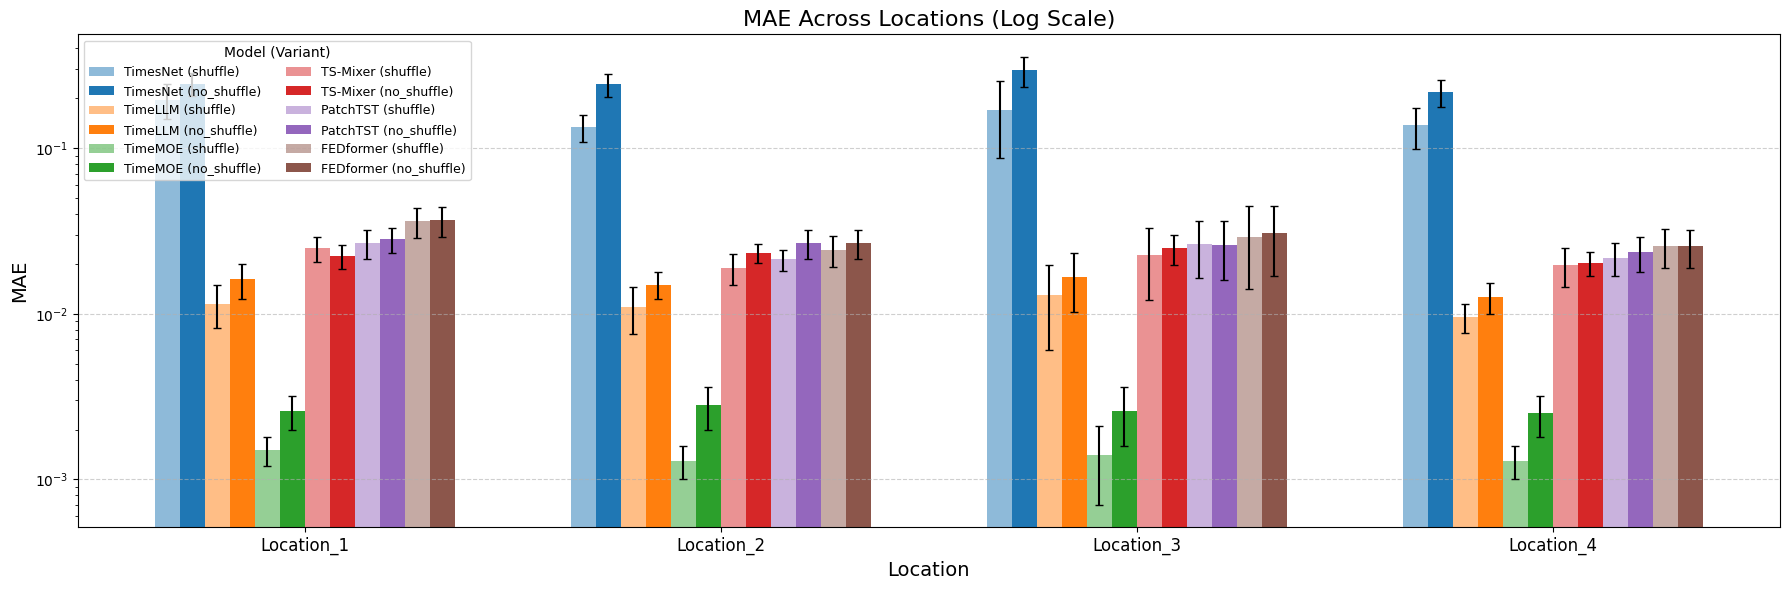

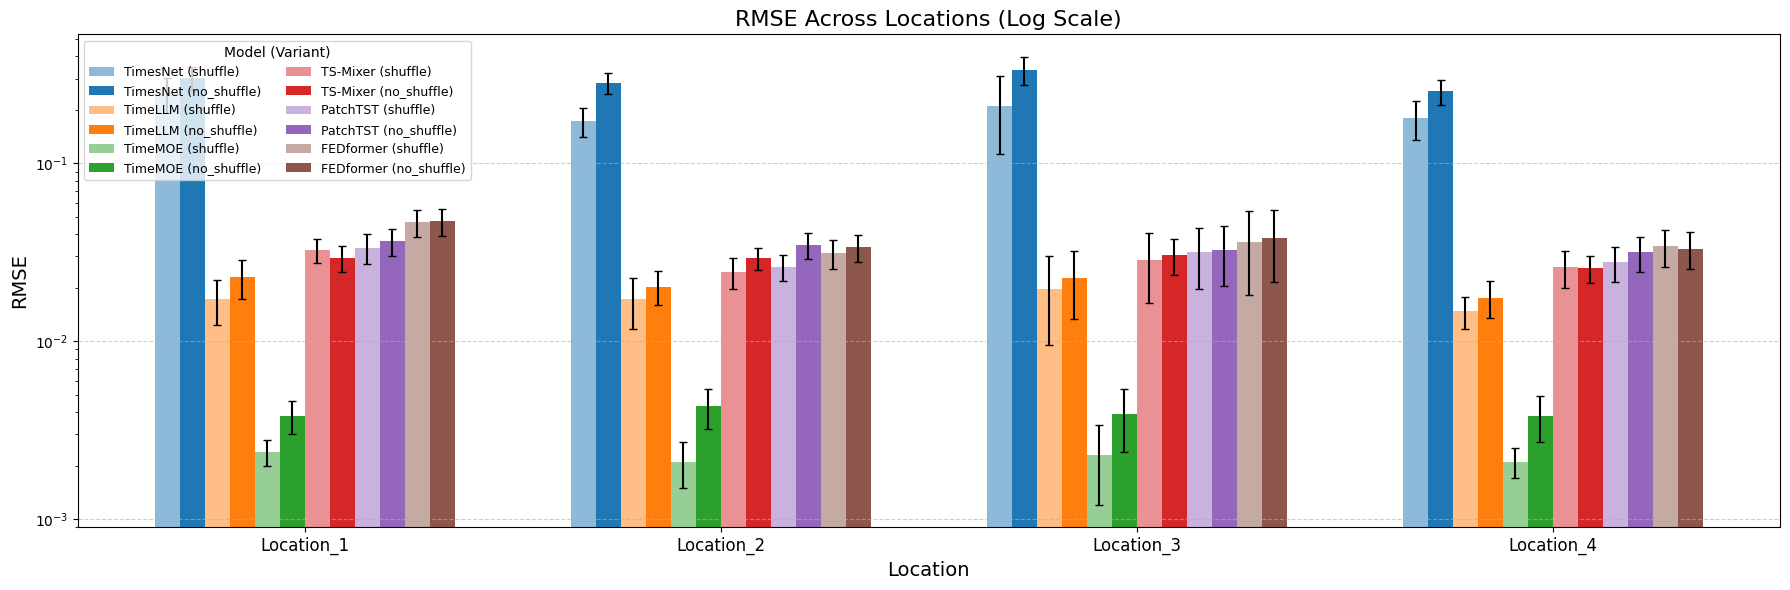

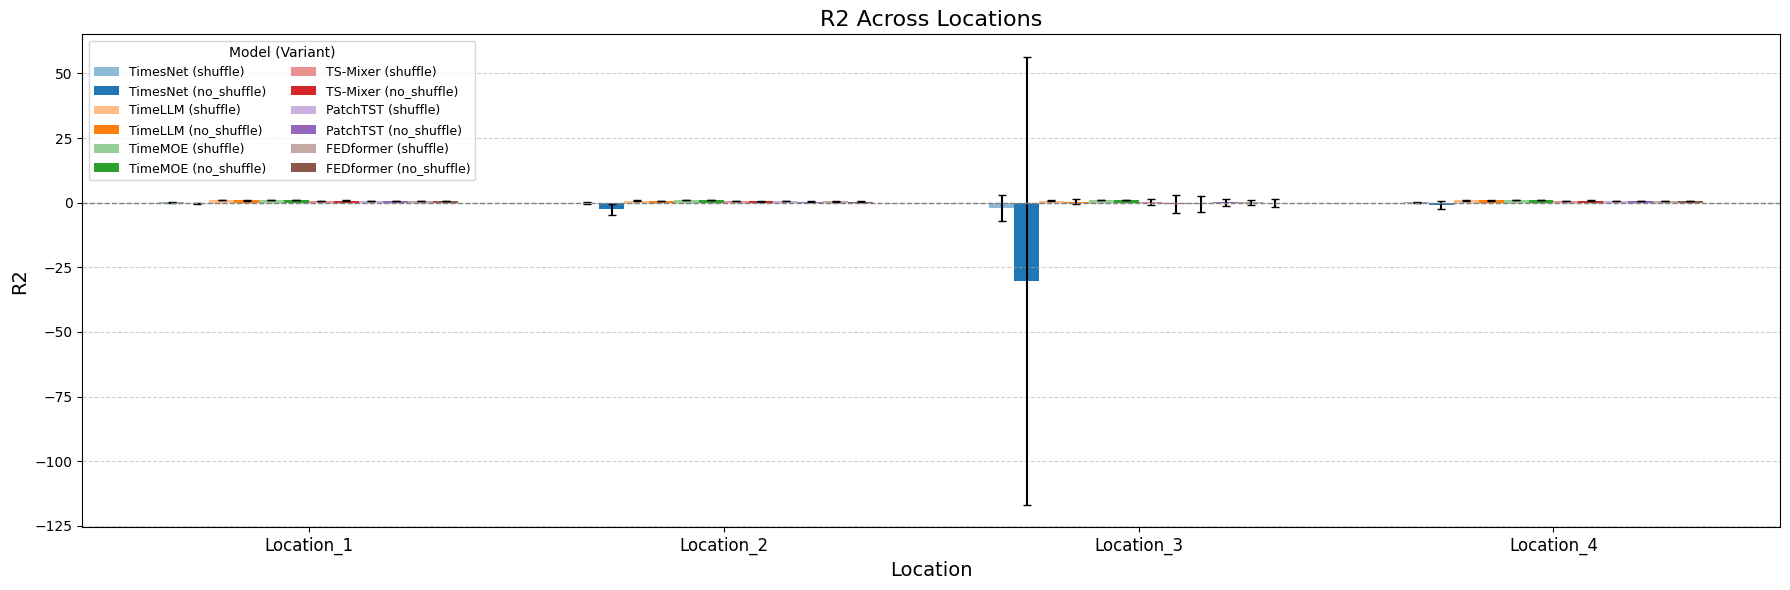

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define constants
locations = ['Location_1', 'Location_2', 'Location_3', 'Location_4']
metrics = ['MAE', 'RMSE', 'R2']
base_models = list(structured_results_df_cleaned['Model'].unique())
variants = ['shuffle','no_shuffle']
all_models = [f"{bm} ({v})" for bm in base_models for v in variants]

# Assign consistent colors for Original and Augmented
base_colors = list(mcolors.TABLEAU_COLORS.values())[:len(base_models)]
color_map = {}
for i, bm in enumerate(base_models):
    color_map[f"{bm} (shuffle)"] = mcolors.to_rgba(base_colors[i], alpha=0.5)
    color_map[f"{bm} (no_shuffle)"] = mcolors.to_rgba(base_colors[i], alpha=1.0)

# Plot per metric
for metric in metrics:
    fig, ax = plt.subplots(figsize=(18, 6))
    x = np.arange(len(locations))  # Base x positions for location groups
    bar_width = 0.06
    total_width = len(all_models) * bar_width
    offset_center = (total_width - bar_width) / 2

    for idx, model_full in enumerate(all_models):
        bm, variant = model_full.split(" (")
        variant = variant.strip(")")
        df_filtered = structured_results_df_cleaned[
            (structured_results_df_cleaned['Model'] == bm) &
            (structured_results_df_cleaned['Metric'] == metric)
        ]

        if df_filtered.empty:
            continue

        # Collect means and stds per location
        means, stds = [], []
        for loc in locations:
            col_name = f"{loc} (shuffle)" if variant == "shuffle" else f"{loc} (no_shuffle)"
            if col_name in df_filtered.columns:
                val = df_filtered[col_name].values[0]
                if isinstance(val, list) and len(val) == 2:
                    means.append(val[0])
                    stds.append(val[1])
                else:
                    means.append(np.nan)
                    stds.append(np.nan)
            else:
                means.append(np.nan)
                stds.append(np.nan)

        # Bar positions shifted for each model
        bar_positions = x - offset_center + idx * bar_width
        ax.bar(bar_positions, means, yerr=stds, width=bar_width,
               color=color_map[model_full], label=model_full, capsize=3)

    # Axis Labels and Style
    title = f"{metric} Across Locations"
    if metric != "R2":
        title += " (Log Scale)"
        ax.set_yscale("log")

    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Location", fontsize=14)
    ax.set_ylabel(metric, fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(locations, fontsize=12)
    ax.grid(True, axis="y", linestyle="--", alpha=0.6)

    if metric == "R2":
        ax.axhline(y=0, color="gray", linestyle="--", linewidth=1)

    ax.set_facecolor("white")
    fig.patch.set_facecolor("white")
    ax.legend(title="Model (Variant)", loc="upper left", ncol=2, fontsize=9)

    plt.tight_layout()
    plt.show()


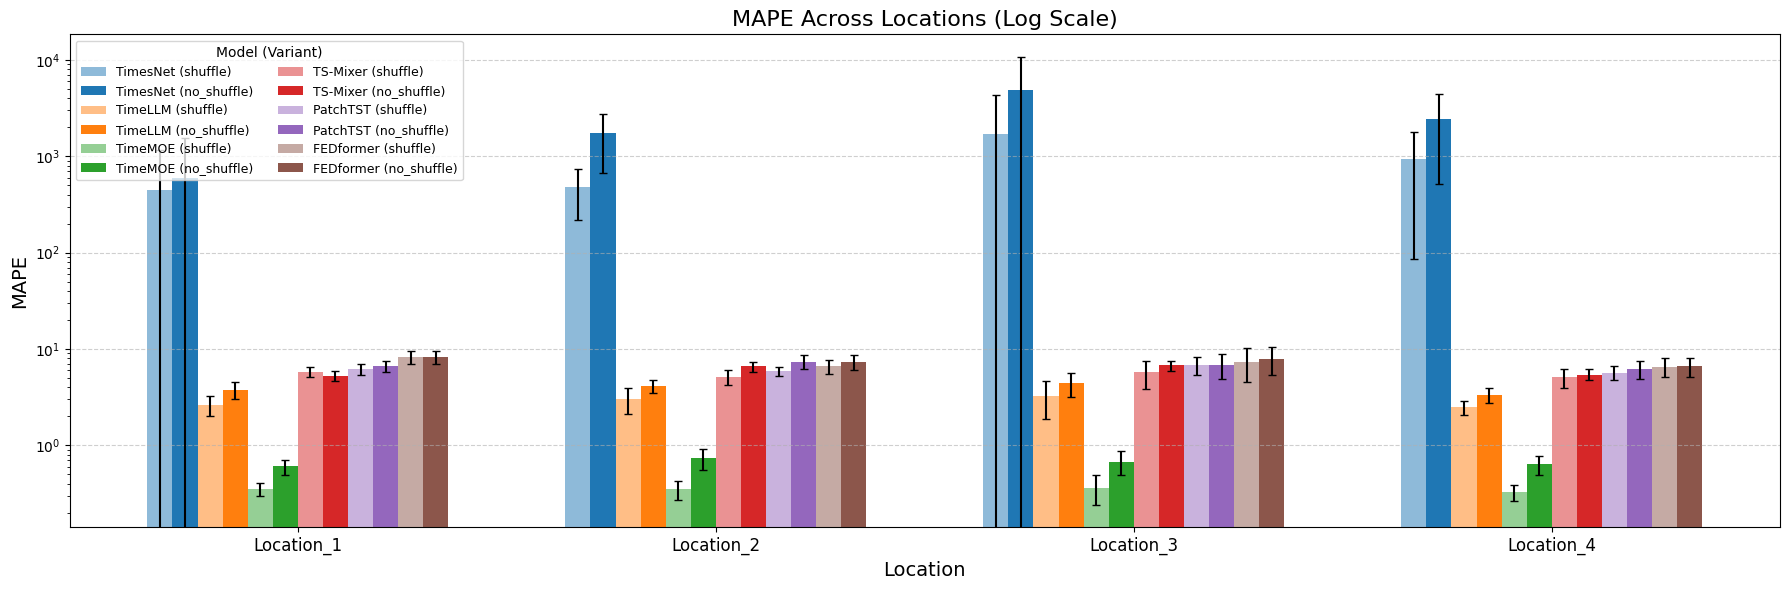

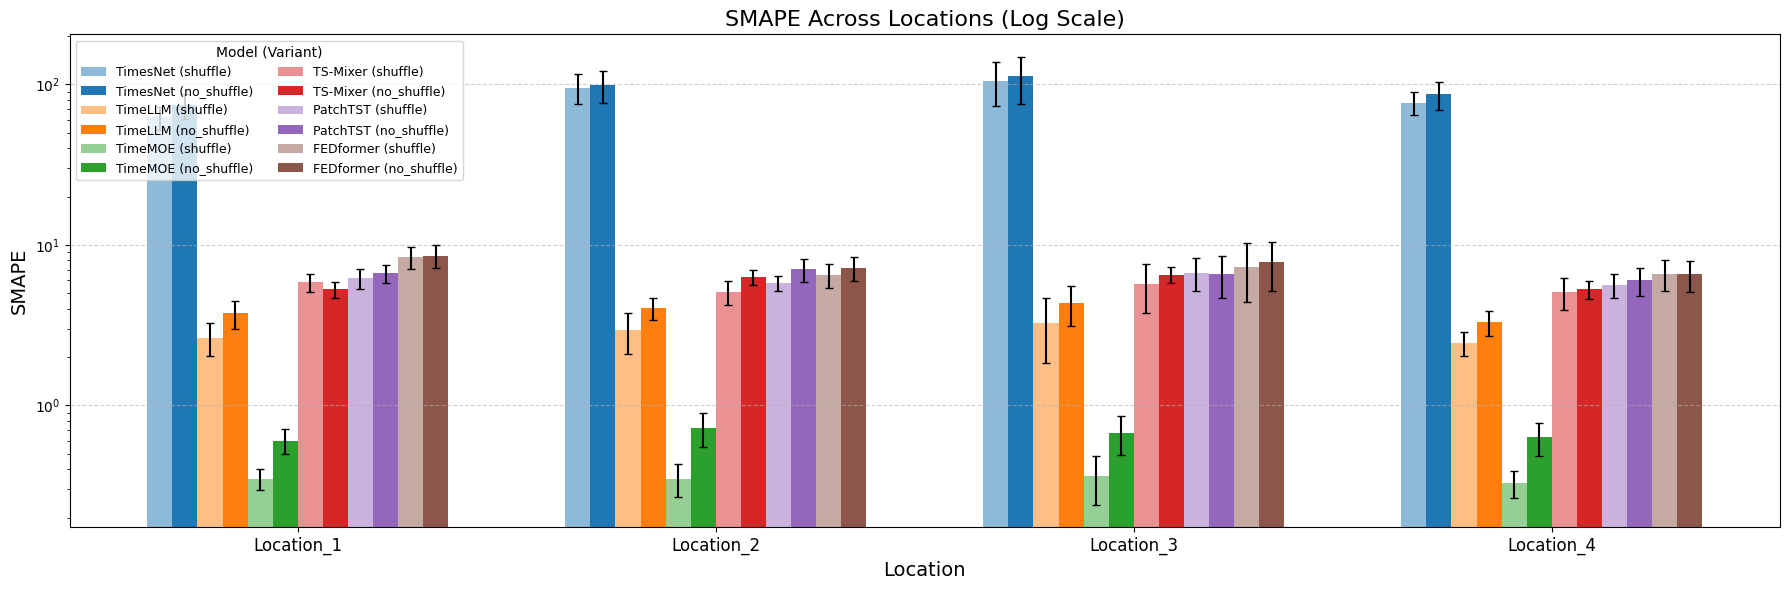

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define constants
locations = ['Location_1', 'Location_2', 'Location_3', 'Location_4']
metrics = ['MAPE','SMAPE']
base_models = list(structured_results_df_cleaned['Model'].unique())
variants = ['shuffle','no_shuffle']
all_models = [f"{bm} ({v})" for bm in base_models for v in variants]

# Assign consistent colors for Original and Augmented
base_colors = list(mcolors.TABLEAU_COLORS.values())[:len(base_models)]
color_map = {}
for i, bm in enumerate(base_models):
    color_map[f"{bm} (shuffle)"] = mcolors.to_rgba(base_colors[i], alpha=0.5)
    color_map[f"{bm} (no_shuffle)"] = mcolors.to_rgba(base_colors[i], alpha=1.0)

# Plot per metric
for metric in metrics:
    fig, ax = plt.subplots(figsize=(18, 6))
    x = np.arange(len(locations))  # Base x positions for location groups
    bar_width = 0.06
    total_width = len(all_models) * bar_width
    offset_center = (total_width - bar_width) / 2

    for idx, model_full in enumerate(all_models):
        bm, variant = model_full.split(" (")
        variant = variant.strip(")")
        df_filtered = structured_results_df_cleaned[
            (structured_results_df_cleaned['Model'] == bm) &
            (structured_results_df_cleaned['Metric'] == metric)
        ]

        if df_filtered.empty:
            continue

        # Collect means and stds per location
        means, stds = [], []
        for loc in locations:
            col_name = f"{loc} (shuffle)" if variant == "shuffle" else f"{loc} (no_shuffle)"
            if col_name in df_filtered.columns:
                val = df_filtered[col_name].values[0]
                if isinstance(val, list) and len(val) == 2:
                    means.append(val[0])
                    stds.append(val[1])
                else:
                    means.append(np.nan)
                    stds.append(np.nan)
            else:
                means.append(np.nan)
                stds.append(np.nan)

        # Bar positions shifted for each model
        bar_positions = x - offset_center + idx * bar_width
        ax.bar(bar_positions, means, yerr=stds, width=bar_width,
               color=color_map[model_full], label=model_full, capsize=3)

    # Axis Labels and Style
    title = f"{metric} Across Locations"
    if metric != "R2":
        title += " (Log Scale)"
        ax.set_yscale("log")

    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Location", fontsize=14)
    ax.set_ylabel(metric, fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(locations, fontsize=12)
    ax.grid(True, axis="y", linestyle="--", alpha=0.6)

    if metric == "R2":
        ax.axhline(y=0, color="gray", linestyle="--", linewidth=1)

    ax.set_facecolor("white")
    fig.patch.set_facecolor("white")
    ax.legend(title="Model (Variant)", loc="upper left", ncol=2, fontsize=9)

    plt.tight_layout()
    plt.show()


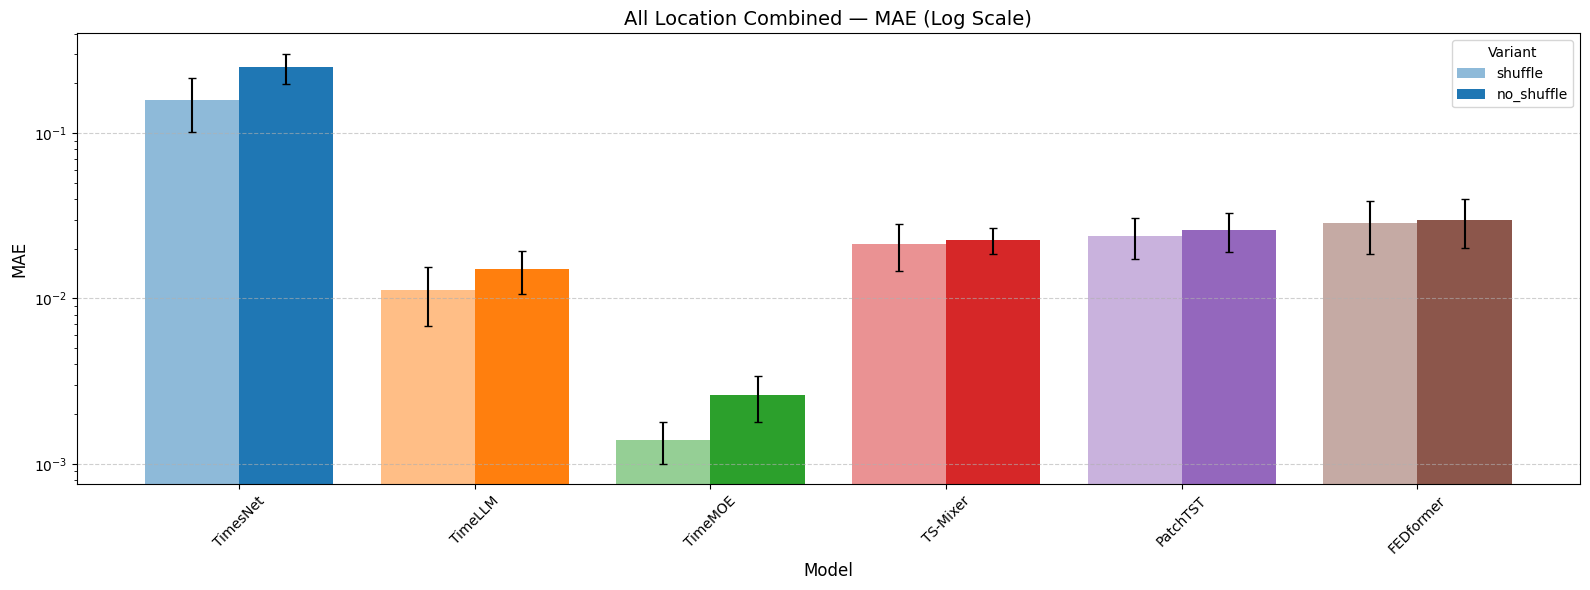

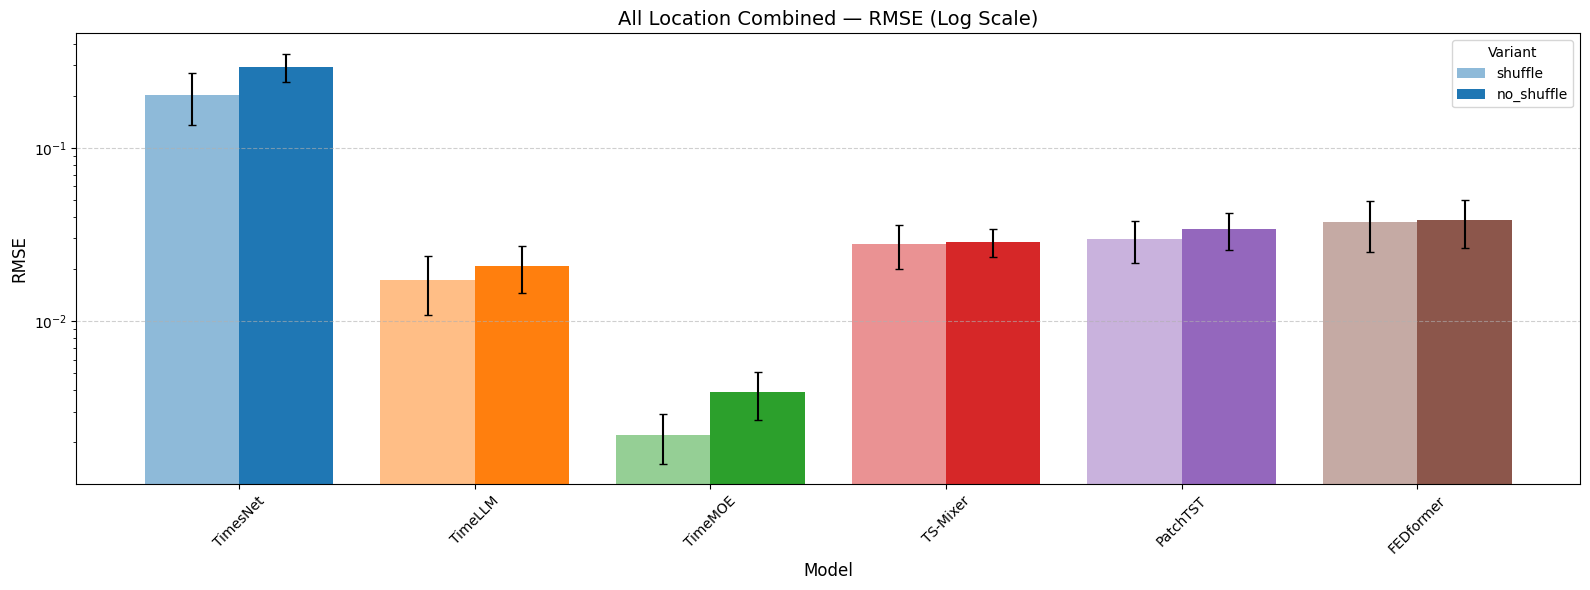

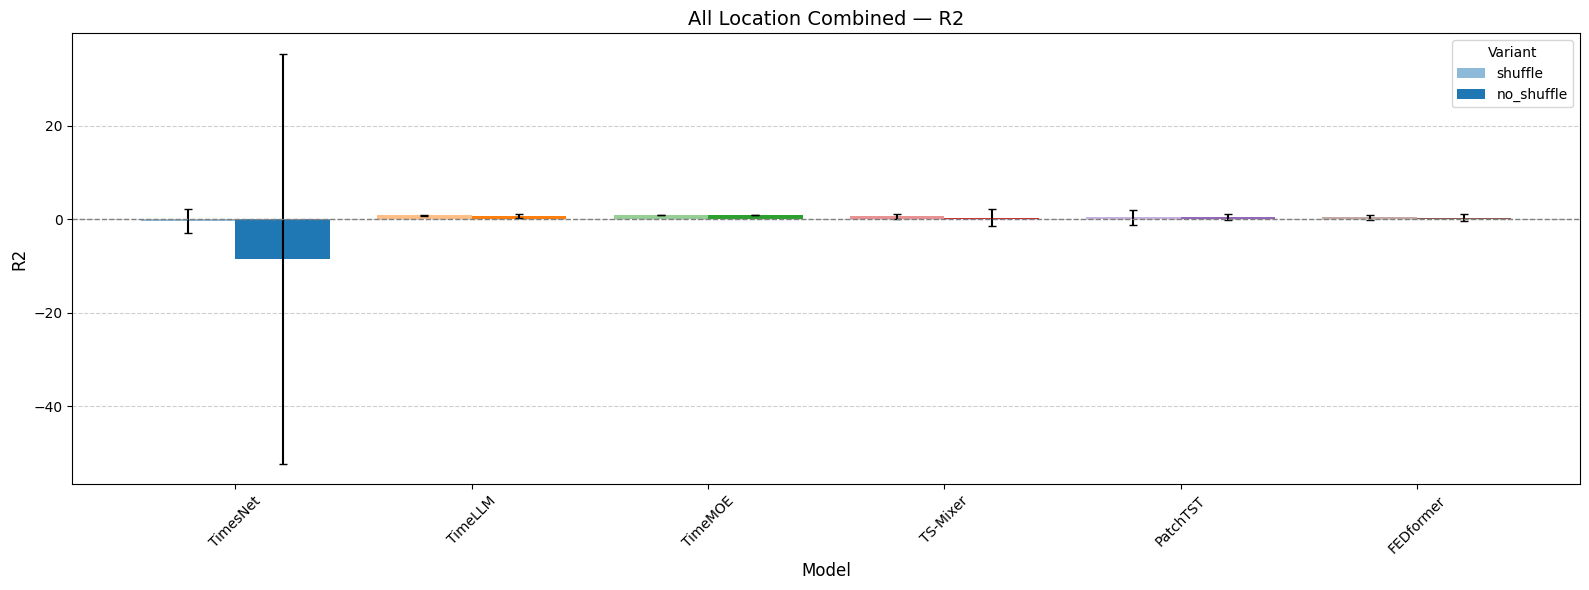

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define constants
metrics = ['MAE', 'RMSE', 'R2']
base_models = list(structured_results_df_cleaned['Model'].unique())
variants = ['shuffle', 'no_shuffle']
all_models = [f"{bm} ({v})" for bm in base_models for v in variants]

# Colors (light for original, dark for augmented)
base_colors = list(mcolors.TABLEAU_COLORS.values())[:len(base_models)]
color_map = {}
for i, bm in enumerate(base_models):
    color_map[f"{bm} (shuffle)"] = mcolors.to_rgba(base_colors[i], alpha=0.5)
    color_map[f"{bm} (no_shuffle)"] = mcolors.to_rgba(base_colors[i], alpha=1.0)

# Metric Loop (One plot per metric)
for metric in metrics:
    fig, ax = plt.subplots(figsize=(16, 6))
    bar_width = 0.4
    x = np.arange(len(base_models))  # Base positions for models

    for v_idx, variant in enumerate(variants):
        means, stds = [], []

        for model in base_models:
            df_filtered = structured_results_df_cleaned[
                (structured_results_df_cleaned['Model'] == model) &
                (structured_results_df_cleaned['Metric'] == metric)
            ]
            if df_filtered.empty:
                means.append(np.nan)
                stds.append(np.nan)
                continue

            col_name = 'All Location Combined (shuffle)' if variant == 'shuffle' else 'All Location Combined (no_shuffle)'
            if col_name in df_filtered.columns:
                val = df_filtered[col_name].values[0]
                if isinstance(val, list) and len(val) == 2:
                    means.append(val[0])
                    stds.append(val[1])
                else:
                    means.append(np.nan)
                    stds.append(np.nan)
            else:
                means.append(np.nan)
                stds.append(np.nan)

        # Bar positions shifted for Original and Augmented
        bar_pos = x + (v_idx - 0.5) * bar_width
        label_variant = f"{variant}"
        ax.bar(bar_pos, means, yerr=stds, width=bar_width,
               color=[color_map[f"{model} ({variant})"] for model in base_models],
               label=label_variant, capsize=3)

    # Final Touches
    title = f'All Location Combined — {metric}'
    if metric != 'R2':
        title += ' (Log Scale)'

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(base_models, rotation=45)

    if metric != 'R2':
        ax.set_yscale('log')  # Only for MAE and RMSE

    # Optional: Highlight zero baseline for R2
    if metric == 'R2':
        ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)

    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    ax.legend(title="Variant", loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()


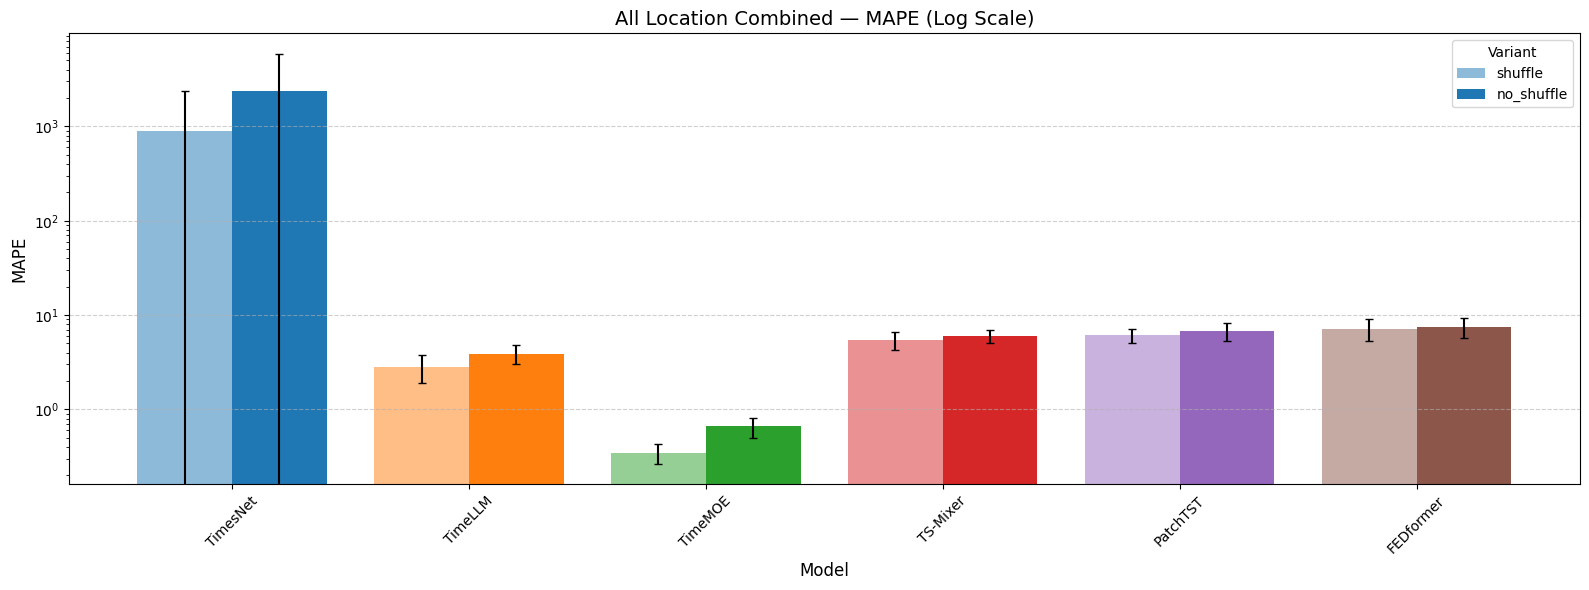

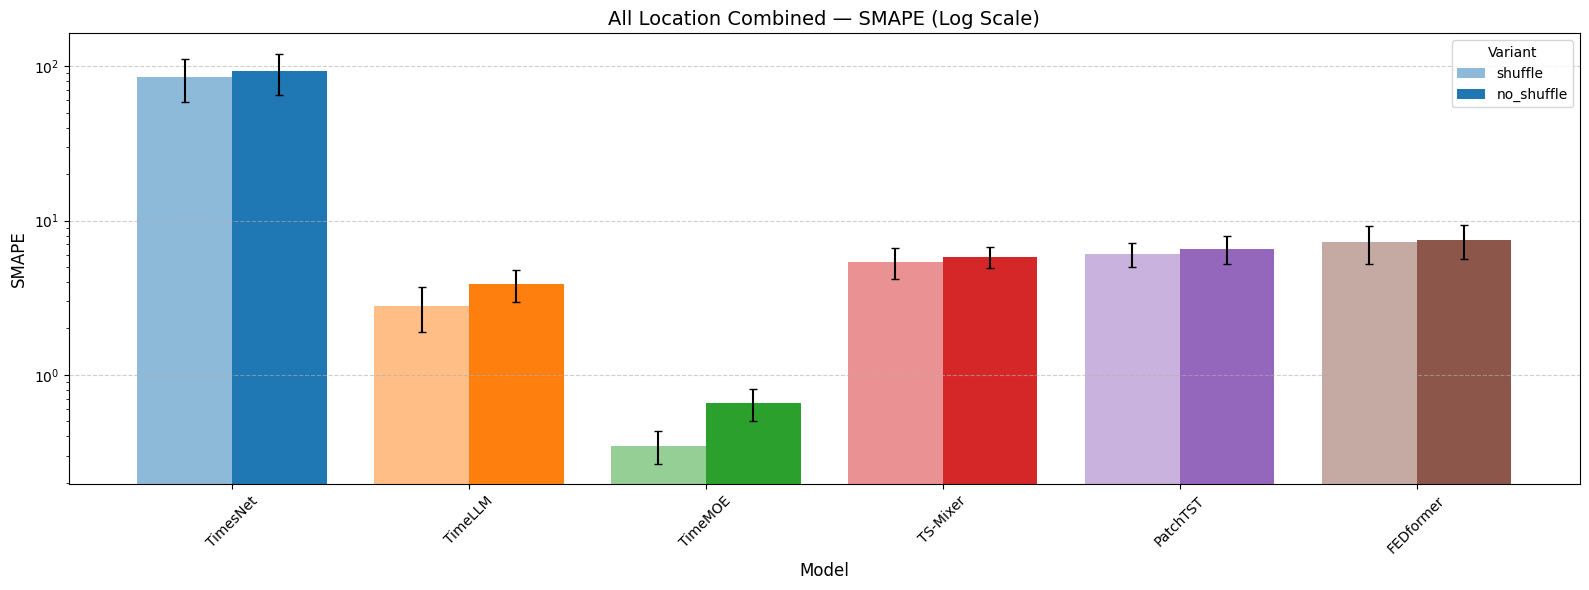

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define constants
metrics = ['MAPE','SMAPE']
base_models = list(structured_results_df_cleaned['Model'].unique())
variants = ['shuffle', 'no_shuffle']
all_models = [f"{bm} ({v})" for bm in base_models for v in variants]

# Colors (light for original, dark for augmented)
base_colors = list(mcolors.TABLEAU_COLORS.values())[:len(base_models)]
color_map = {}
for i, bm in enumerate(base_models):
    color_map[f"{bm} (shuffle)"] = mcolors.to_rgba(base_colors[i], alpha=0.5)
    color_map[f"{bm} (no_shuffle)"] = mcolors.to_rgba(base_colors[i], alpha=1.0)

# Metric Loop (One plot per metric)
for metric in metrics:
    fig, ax = plt.subplots(figsize=(16, 6))
    bar_width = 0.4
    x = np.arange(len(base_models))  # Base positions for models

    for v_idx, variant in enumerate(variants):
        means, stds = [], []

        for model in base_models:
            df_filtered = structured_results_df_cleaned[
                (structured_results_df_cleaned['Model'] == model) &
                (structured_results_df_cleaned['Metric'] == metric)
            ]
            if df_filtered.empty:
                means.append(np.nan)
                stds.append(np.nan)
                continue

            col_name = 'All Location Combined (shuffle)' if variant == 'shuffle' else 'All Location Combined (no_shuffle)'
            if col_name in df_filtered.columns:
                val = df_filtered[col_name].values[0]
                if isinstance(val, list) and len(val) == 2:
                    means.append(val[0])
                    stds.append(val[1])
                else:
                    means.append(np.nan)
                    stds.append(np.nan)
            else:
                means.append(np.nan)
                stds.append(np.nan)

        # Bar positions shifted for Original and Augmented
        bar_pos = x + (v_idx - 0.5) * bar_width
        label_variant = f"{variant}"
        ax.bar(bar_pos, means, yerr=stds, width=bar_width,
               color=[color_map[f"{model} ({variant})"] for model in base_models],
               label=label_variant, capsize=3)

    # Final Touches
    title = f'All Location Combined — {metric}'
    if metric != 'R2':
        title += ' (Log Scale)'

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(base_models, rotation=45)

    if metric != 'R2':
        ax.set_yscale('log')  # Only for MAE and RMSE

    # Optional: Highlight zero baseline for R2
    if metric == 'R2':
        ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)

    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    ax.legend(title="Variant", loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()


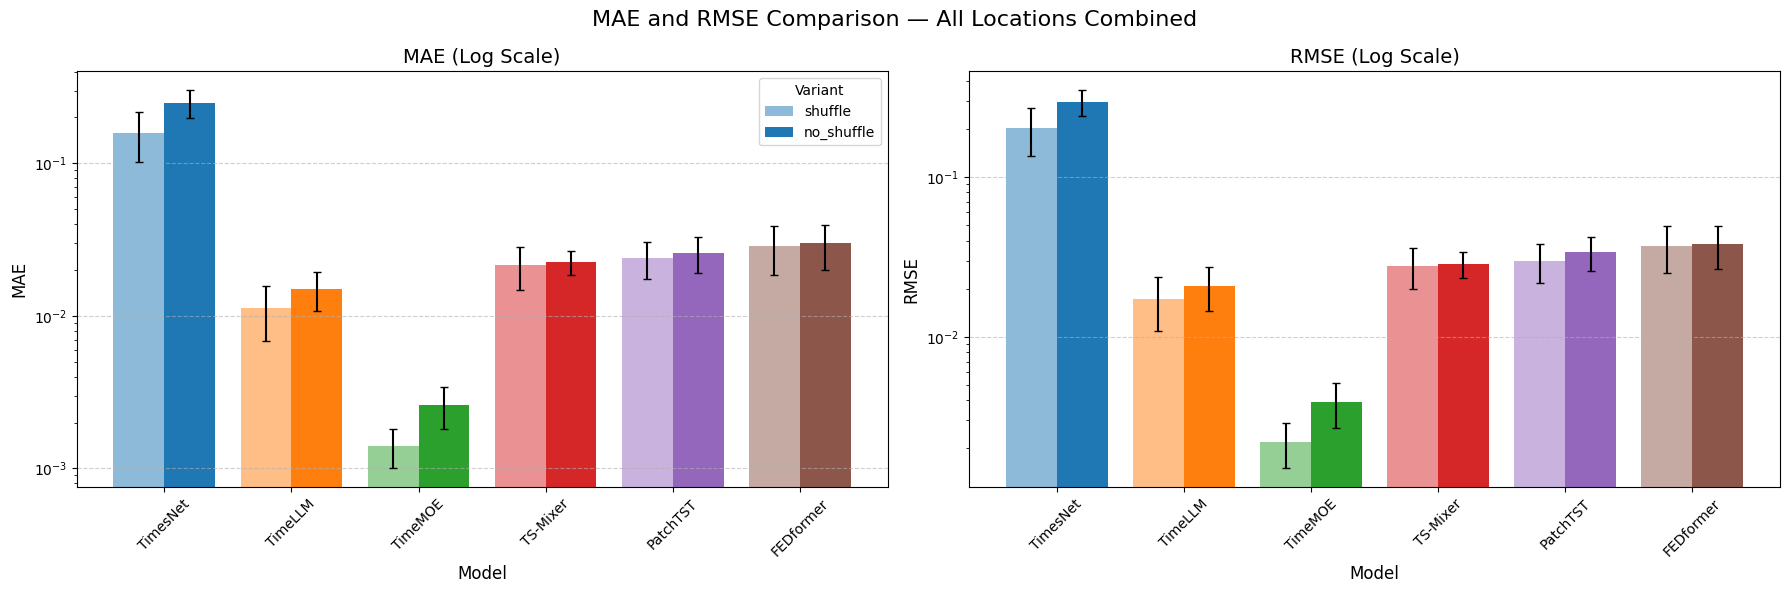

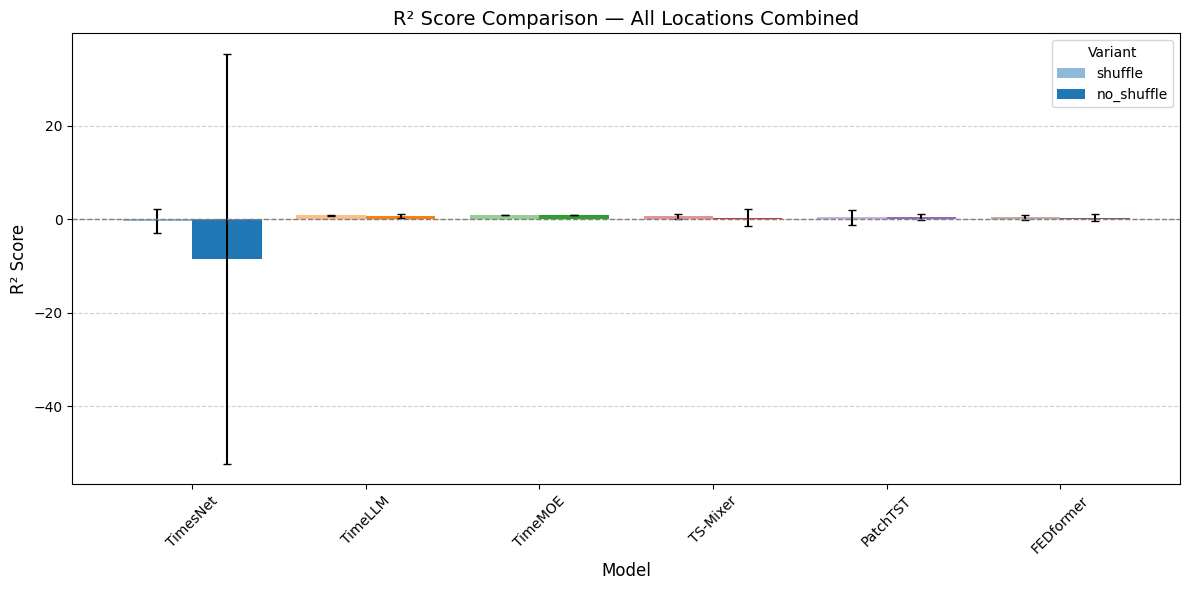

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define constants
error_metrics = ['MAE', 'RMSE']
all_metrics = ['MAE', 'RMSE', 'R2']
base_models = list(structured_results_df_cleaned['Model'].unique())
variants = ['shuffle', 'no_shuffle']
all_models = [f"{bm} ({v})" for bm in base_models for v in variants]

# Color setup
base_colors = list(mcolors.TABLEAU_COLORS.values())[:len(base_models)]
color_map = {}
for i, bm in enumerate(base_models):
    color_map[f"{bm} (shuffle)"] = mcolors.to_rgba(base_colors[i], alpha=0.5)
    color_map[f"{bm} (no_shuffle)"] = mcolors.to_rgba(base_colors[i], alpha=1.0)

# ========== Plot for MAE and RMSE Combined ==========
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 2 subplots for MAE and RMSE
bar_width = 0.4
x = np.arange(len(base_models))  # x-axis positions for models

for ax_idx, metric in enumerate(error_metrics):
    ax = axs[ax_idx]

    for v_idx, variant in enumerate(variants):
        means, stds = [], []

        for model in base_models:
            df_filtered = structured_results_df_cleaned[
                (structured_results_df_cleaned['Model'] == model) &
                (structured_results_df_cleaned['Metric'] == metric)
            ]
            if df_filtered.empty:
                means.append(np.nan)
                stds.append(np.nan)
                continue

            col_name = 'All Location Combined (shuffle)' if variant == 'shuffle' else 'All Location Combined (no_shuffle)'
            val = df_filtered[col_name].values[0] if col_name in df_filtered else [np.nan, np.nan]
            if isinstance(val, list) and len(val) == 2:
                means.append(val[0])
                stds.append(val[1])
            else:
                means.append(np.nan)
                stds.append(np.nan)

        bar_pos = x + (v_idx - 0.5) * bar_width
        ax.bar(bar_pos, means, yerr=stds, width=bar_width,
               color=[color_map[f"{model} ({variant})"] for model in base_models],
               label=variant, capsize=3)

    ax.set_title(f'{metric} (Log Scale)', fontsize=14)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(base_models, rotation=45)
    ax.set_yscale('log')
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.set_facecolor('white')

axs[0].legend(title="Variant", loc='upper right', fontsize=10)
fig.suptitle('MAE and RMSE Comparison — All Locations Combined', fontsize=16)
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

# ========== Plot for R2 Separately ==========
fig, ax = plt.subplots(figsize=(12, 6))

for v_idx, variant in enumerate(variants):
    means, stds = [], []

    for model in base_models:
        df_filtered = structured_results_df_cleaned[
            (structured_results_df_cleaned['Model'] == model) &
            (structured_results_df_cleaned['Metric'] == 'R2')
        ]
        if df_filtered.empty:
            means.append(np.nan)
            stds.append(np.nan)
            continue

        col_name = 'All Location Combined (shuffle)' if variant == 'shuffle' else 'All Location Combined (no_shuffle)'
        val = df_filtered[col_name].values[0] if col_name in df_filtered else [np.nan, np.nan]
        if isinstance(val, list) and len(val) == 2:
            means.append(val[0])
            stds.append(val[1])
        else:
            means.append(np.nan)
            stds.append(np.nan)

    bar_pos = x + (v_idx - 0.5) * bar_width
    ax.bar(bar_pos, means, yerr=stds, width=bar_width,
           color=[color_map[f"{model} ({variant})"] for model in base_models],
           label=variant, capsize=3)

ax.set_title('R² Score Comparison — All Locations Combined', fontsize=14)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('R² Score', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(base_models, rotation=45)
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
ax.set_facecolor('white')
fig.patch.set_facecolor('white')
ax.legend(title="Variant", loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


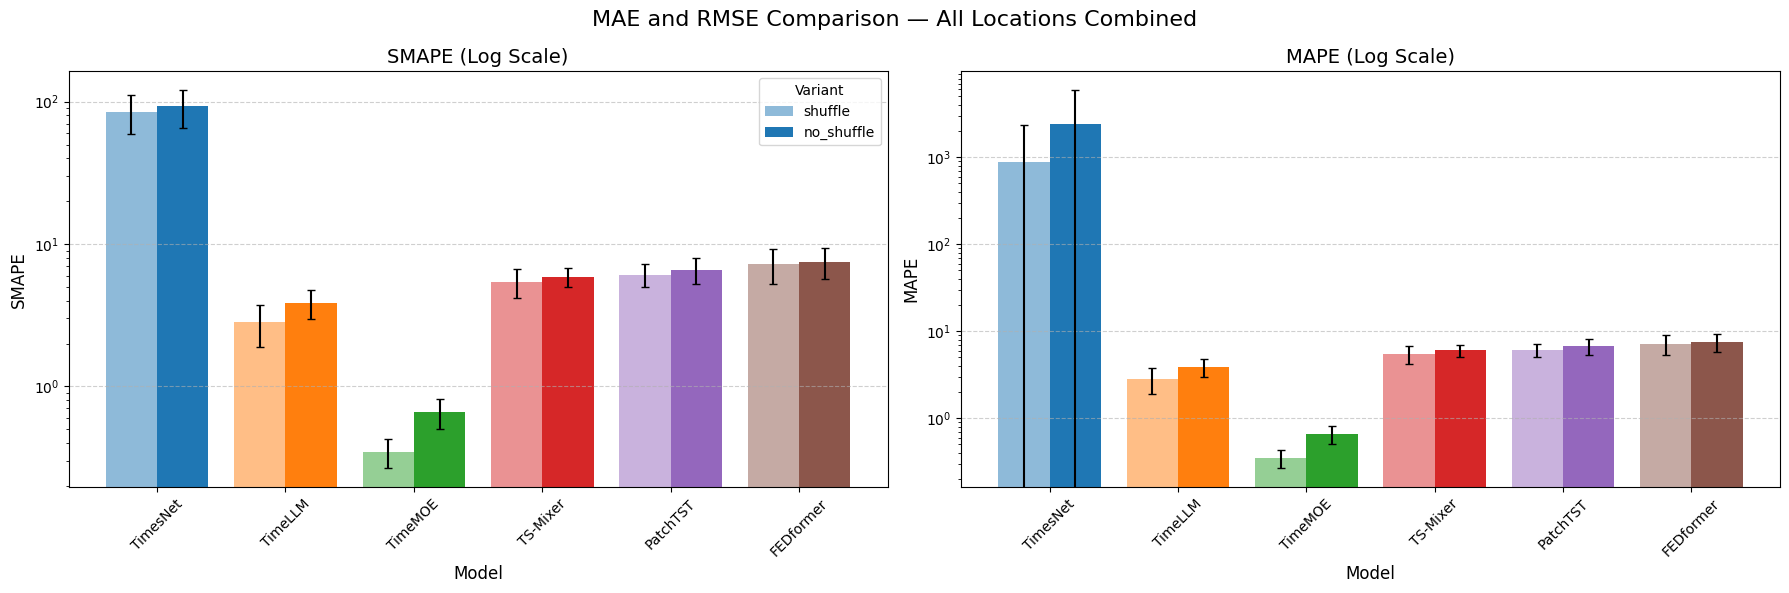

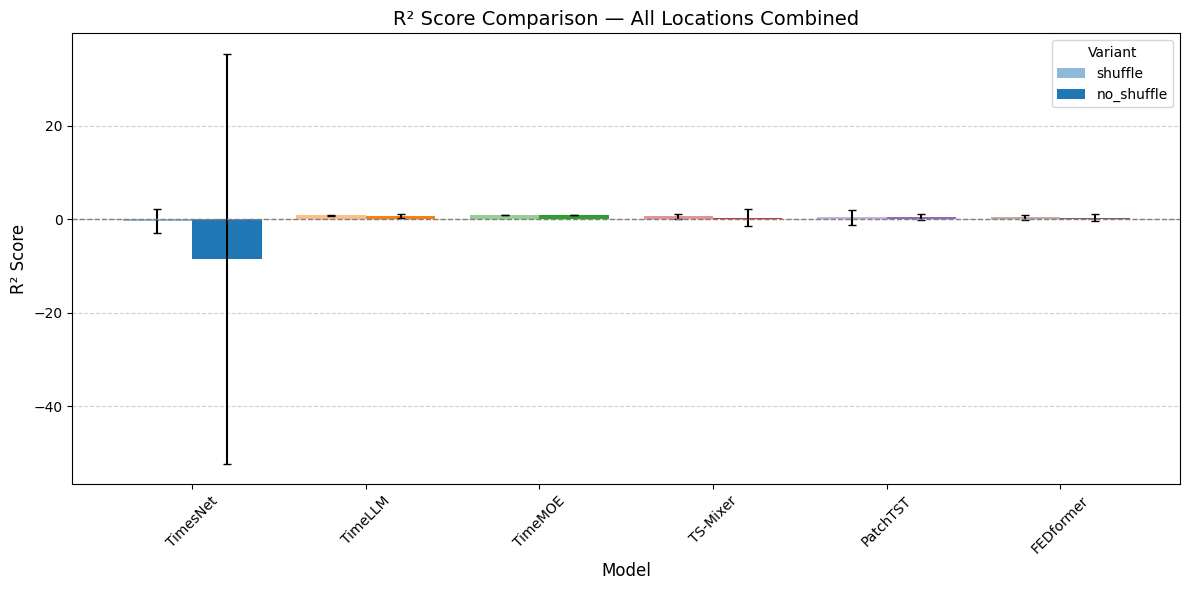

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define constants
error_metrics = ['SMAPE','MAPE']
all_metrics = ['SMAPE','MAPE']
base_models = list(structured_results_df_cleaned['Model'].unique())
variants = ['shuffle', 'no_shuffle']
all_models = [f"{bm} ({v})" for bm in base_models for v in variants]

# Color setup
base_colors = list(mcolors.TABLEAU_COLORS.values())[:len(base_models)]
color_map = {}
for i, bm in enumerate(base_models):
    color_map[f"{bm} (shuffle)"] = mcolors.to_rgba(base_colors[i], alpha=0.5)
    color_map[f"{bm} (no_shuffle)"] = mcolors.to_rgba(base_colors[i], alpha=1.0)

# ========== Plot for MAE and RMSE Combined ==========
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 2 subplots for MAE and RMSE
bar_width = 0.4
x = np.arange(len(base_models))  # x-axis positions for models

for ax_idx, metric in enumerate(error_metrics):
    ax = axs[ax_idx]

    for v_idx, variant in enumerate(variants):
        means, stds = [], []

        for model in base_models:
            df_filtered = structured_results_df_cleaned[
                (structured_results_df_cleaned['Model'] == model) &
                (structured_results_df_cleaned['Metric'] == metric)
            ]
            if df_filtered.empty:
                means.append(np.nan)
                stds.append(np.nan)
                continue

            col_name = 'All Location Combined (shuffle)' if variant == 'shuffle' else 'All Location Combined (no_shuffle)'
            val = df_filtered[col_name].values[0] if col_name in df_filtered else [np.nan, np.nan]
            if isinstance(val, list) and len(val) == 2:
                means.append(val[0])
                stds.append(val[1])
            else:
                means.append(np.nan)
                stds.append(np.nan)

        bar_pos = x + (v_idx - 0.5) * bar_width
        ax.bar(bar_pos, means, yerr=stds, width=bar_width,
               color=[color_map[f"{model} ({variant})"] for model in base_models],
               label=variant, capsize=3)

    ax.set_title(f'{metric} (Log Scale)', fontsize=14)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(base_models, rotation=45)
    ax.set_yscale('log')
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.set_facecolor('white')

axs[0].legend(title="Variant", loc='upper right', fontsize=10)
fig.suptitle('MAE and RMSE Comparison — All Locations Combined', fontsize=16)
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

# ========== Plot for R2 Separately ==========
fig, ax = plt.subplots(figsize=(12, 6))

for v_idx, variant in enumerate(variants):
    means, stds = [], []

    for model in base_models:
        df_filtered = structured_results_df_cleaned[
            (structured_results_df_cleaned['Model'] == model) &
            (structured_results_df_cleaned['Metric'] == 'R2')
        ]
        if df_filtered.empty:
            means.append(np.nan)
            stds.append(np.nan)
            continue

        col_name = 'All Location Combined (shuffle)' if variant == 'shuffle' else 'All Location Combined (no_shuffle)'
        val = df_filtered[col_name].values[0] if col_name in df_filtered else [np.nan, np.nan]
        if isinstance(val, list) and len(val) == 2:
            means.append(val[0])
            stds.append(val[1])
        else:
            means.append(np.nan)
            stds.append(np.nan)

    bar_pos = x + (v_idx - 0.5) * bar_width
    ax.bar(bar_pos, means, yerr=stds, width=bar_width,
           color=[color_map[f"{model} ({variant})"] for model in base_models],
           label=variant, capsize=3)

ax.set_title('R² Score Comparison — All Locations Combined', fontsize=14)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('R² Score', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(base_models, rotation=45)
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
ax.set_facecolor('white')
fig.patch.set_facecolor('white')
ax.legend(title="Variant", loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


In [102]:
import matplotlib.pyplot as plt
import numpy as np

def plot_spider_metric_per_model(df, metric='MAE', variant='shuffle', top_n_models=5):
    # Identify location columns, excluding 'All' and selecting only the variant
    suffix = '(shuffle)' if variant == 'shuffle' else '(no_shuffle)'
    location_cols = [col for col in df.columns if col.endswith(suffix) and not col.startswith('All')]
    location_names = [col.replace(f' {suffix}', '') for col in location_cols]

    # Filter DataFrame by metric
    df_metric = df[df['Metric'] == metric].copy()

    # Sort models by average value across selected locations
    model_means = []
    for _, row in df_metric.iterrows():
        values = []
        for col in location_cols:
            val = row[col]
            if isinstance(val, list) and len(val) > 0:
                values.append(val[0])  # use mean
        model_means.append(np.nanmean(values))

    df_metric['MeanAcrossLocs'] = model_means
    df_metric = df_metric.sort_values(by='MeanAcrossLocs', ascending=True if metric != 'R2' else False)
    df_top = df_metric.head(top_n_models)

    # Radar chart setup
    labels = location_names
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]  # close the circle

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for _, row in df_top.iterrows():
        model = row['Model']
        values = [row[f"{loc} {suffix}"][0] if isinstance(row[f"{loc} {suffix}"], list) else np.nan for loc in labels]
        values += values[:1]  # close the circle
        ax.plot(angles, values, label=model)
        ax.fill(angles, values, alpha=0.1)

    ax.set_title(f'{metric} Across Locations ({variant})', size=14)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.grid(True)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()


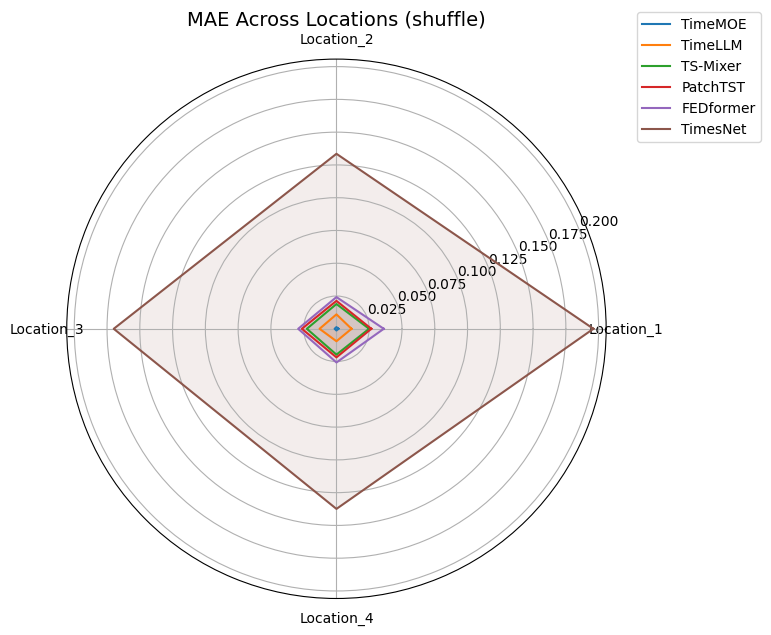

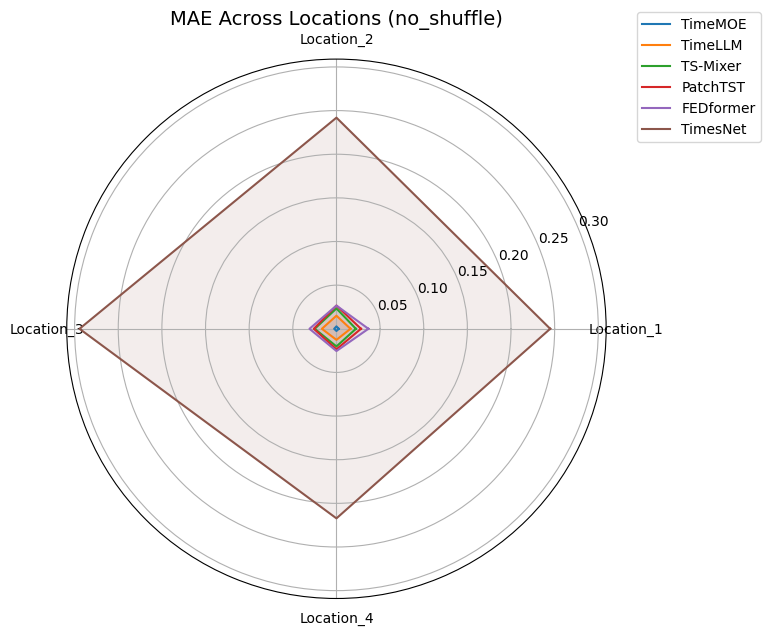

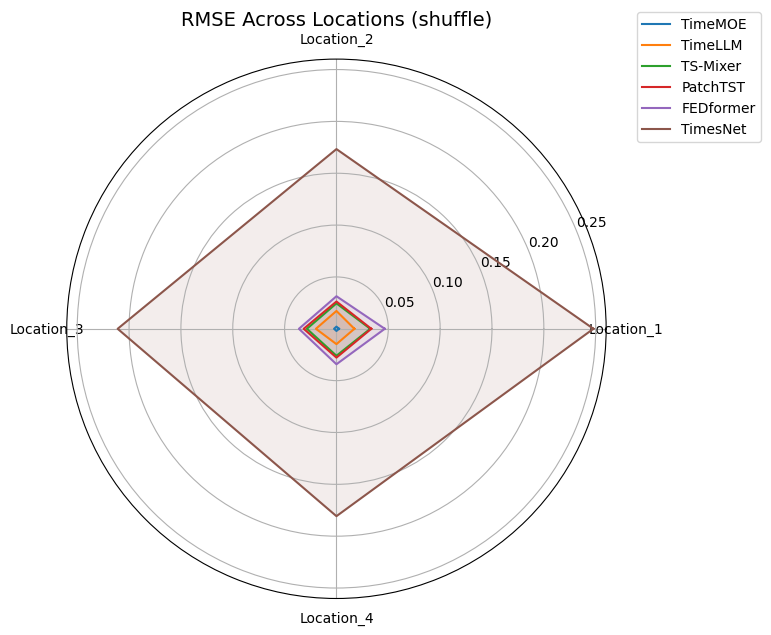

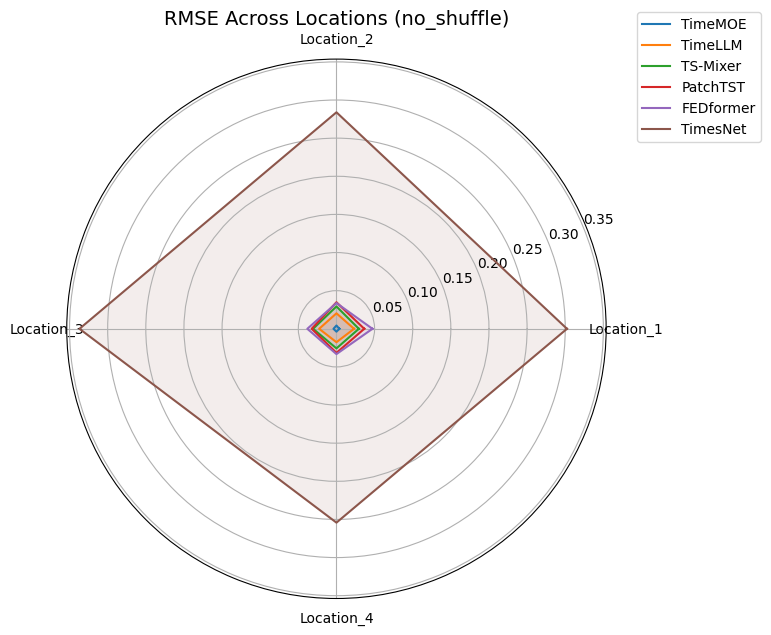

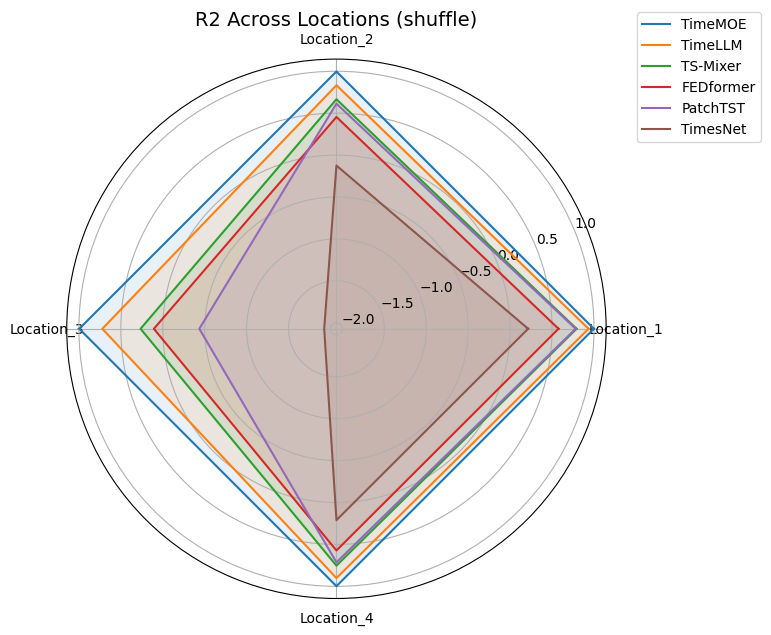

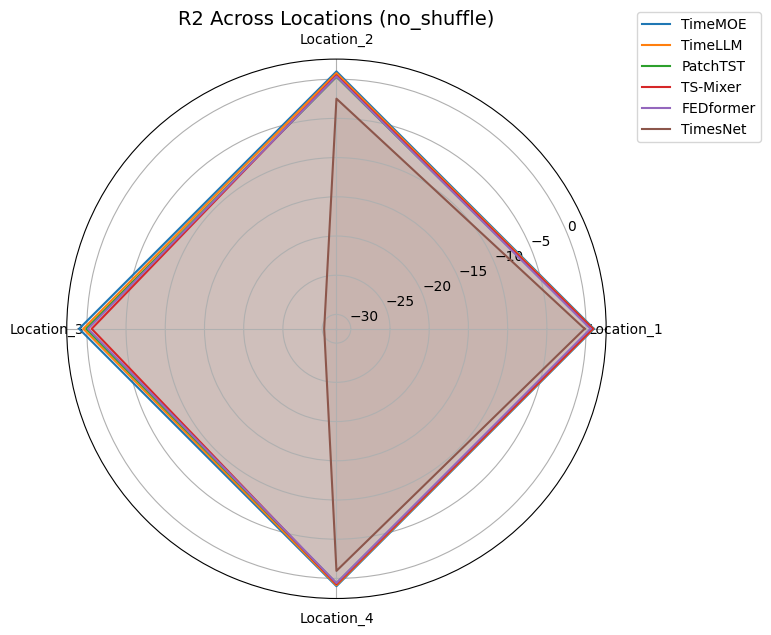

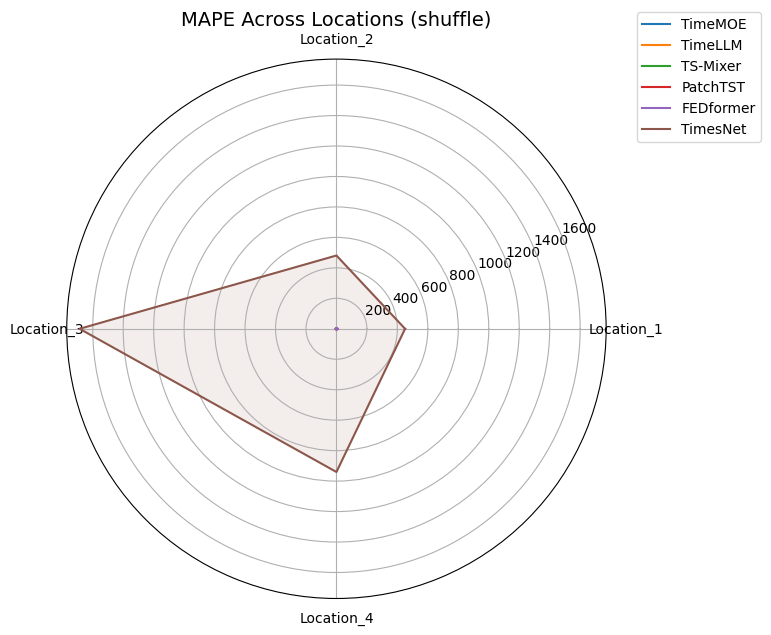

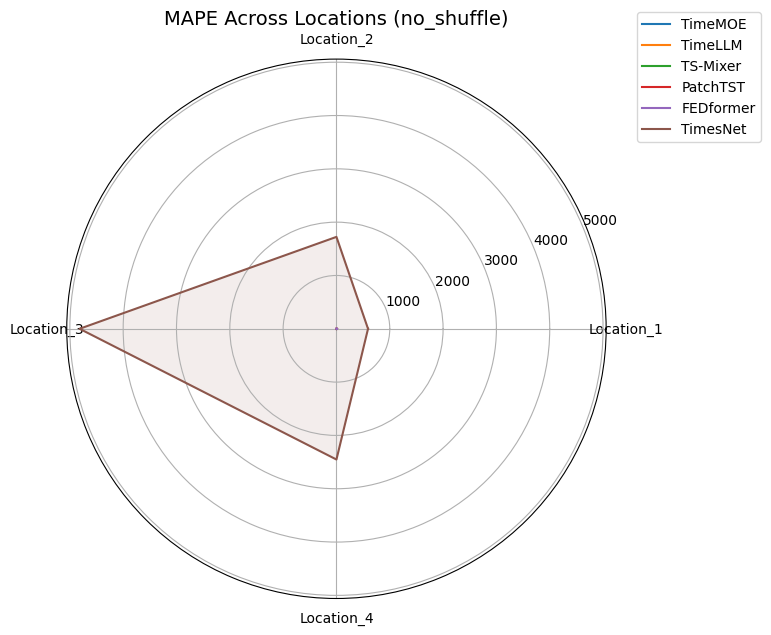

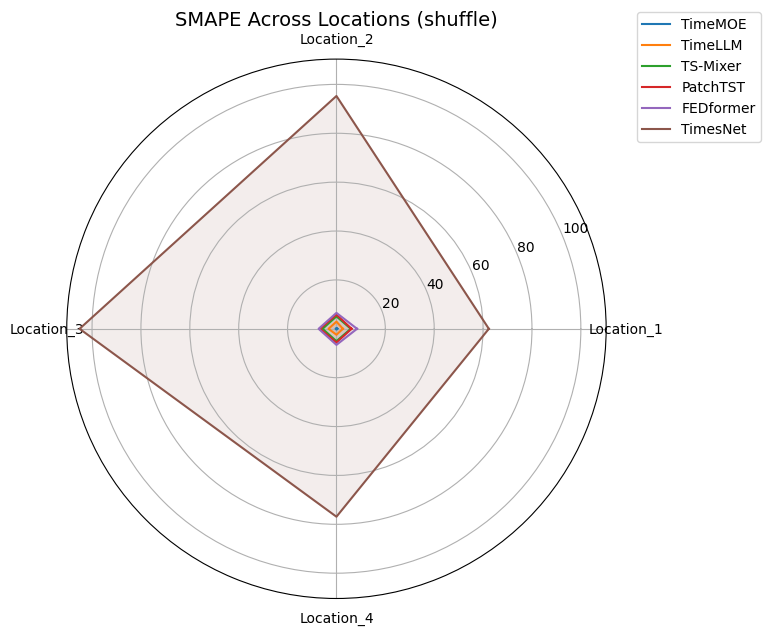

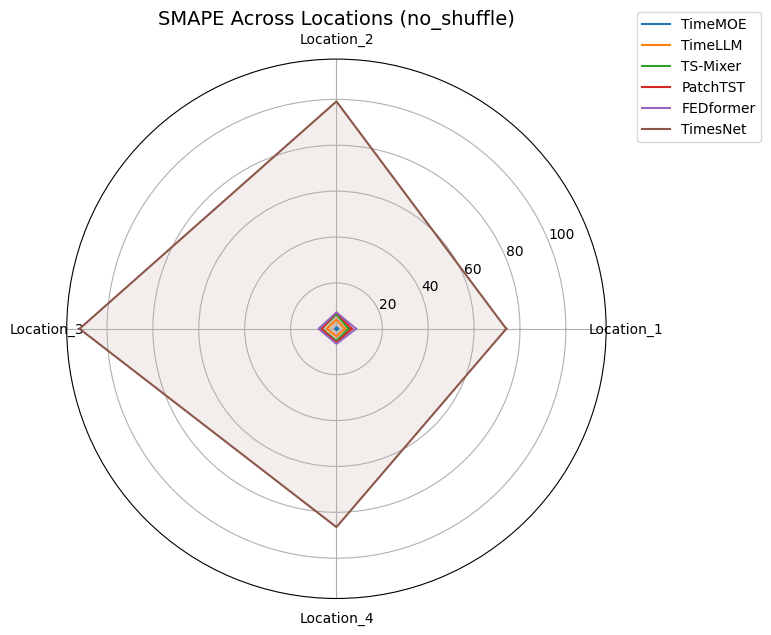

In [103]:
plot_spider_metric_per_model(structured_results_df_cleaned, metric='MAE', variant='shuffle', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='MAE', variant='no_shuffle', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='RMSE', variant='shuffle', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='RMSE', variant='no_shuffle', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='R2', variant='shuffle', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='R2', variant='no_shuffle', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='MAPE', variant='shuffle', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='MAPE', variant='no_shuffle', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='SMAPE', variant='shuffle', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='SMAPE', variant='no_shuffle', top_n_models=8)


In [104]:
import matplotlib.pyplot as plt
import numpy as np

def plot_spider_all_models_with_std(df, metric='MAE'):
    suffixes = {'shuffle': '(suffle)', 'no_shuffle': '(no_shuffle)'}
    
    # Identify location names
    all_location_cols = [col for col in df.columns if any(col.endswith(suffix) for suffix in suffixes.values())]
    location_names = sorted(set(
        col.replace(f' {suffix}', '')
        for col in all_location_cols
        for suffix in suffixes.values()
        if col.endswith(suffix) and not col.startswith("All")
    ))

    # Filter dataframe for selected metric
    df_metric = df[df['Metric'] == metric].copy()

    # Radar setup
    angles = np.linspace(0, 2 * np.pi, len(location_names), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    colors = plt.cm.get_cmap("tab20", len(df_metric))

    for idx, (_, row) in enumerate(df_metric.iterrows()):
        model = row['Model']
        for variant, suffix in suffixes.items():
            means = []
            stds = []

            for loc in location_names:
                col = f"{loc} {suffix}"
                val = row.get(col, [np.nan, 0])
                if isinstance(val, list) and len(val) >= 2:
                    means.append(val[0])
                    stds.append(val[1])
                else:
                    means.append(np.nan)
                    stds.append(0)

            # Wrap around for radar
            means += means[:1]
            stds += stds[:1]

            # Set plot properties
            color = colors(idx)
            linestyle = '-' if variant == 'shuffle' else '--'
            label = f"{model} ({variant})"

            ax.plot(angles, means, linestyle, label=label, color=color)
            ax.fill_between(angles,
                            np.array(means) - np.array(stds),
                            np.array(means) + np.array(stds),
                            alpha=0.1, color=color)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(location_names, fontsize=11)
    ax.set_title(f'{metric} Comparison (shuffle vs no_shuffle) ± std', size=14)
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.02), fontsize=9)
    plt.tight_layout()
    plt.show()


/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_11805/3346605288.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(df_metric))


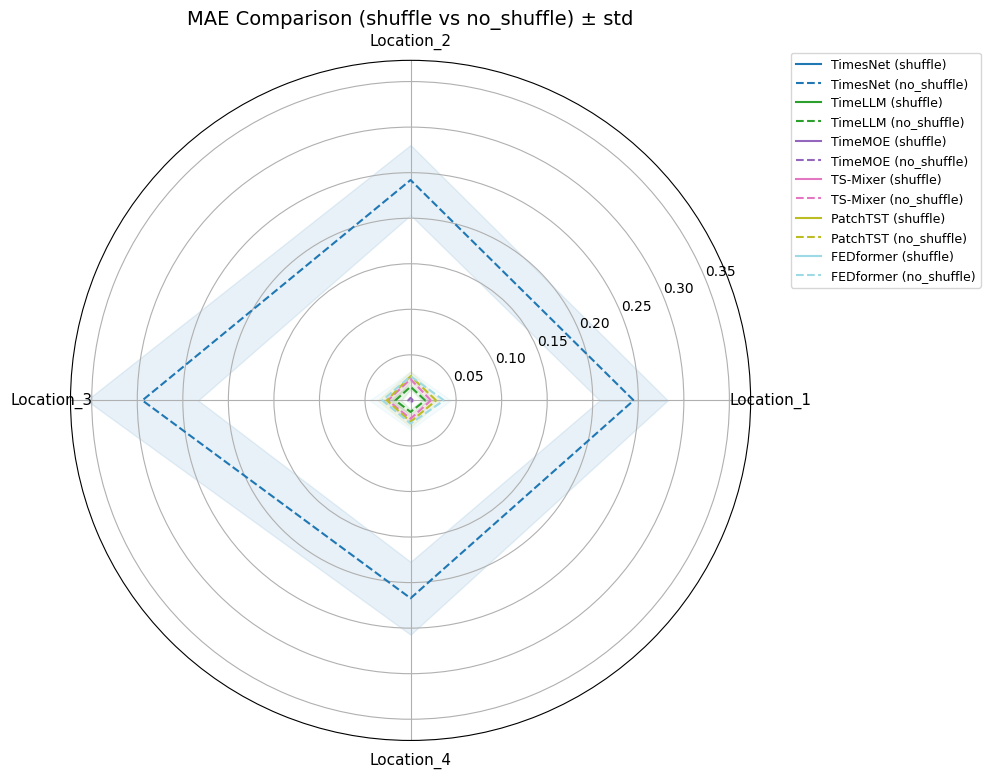

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_11805/3346605288.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(df_metric))


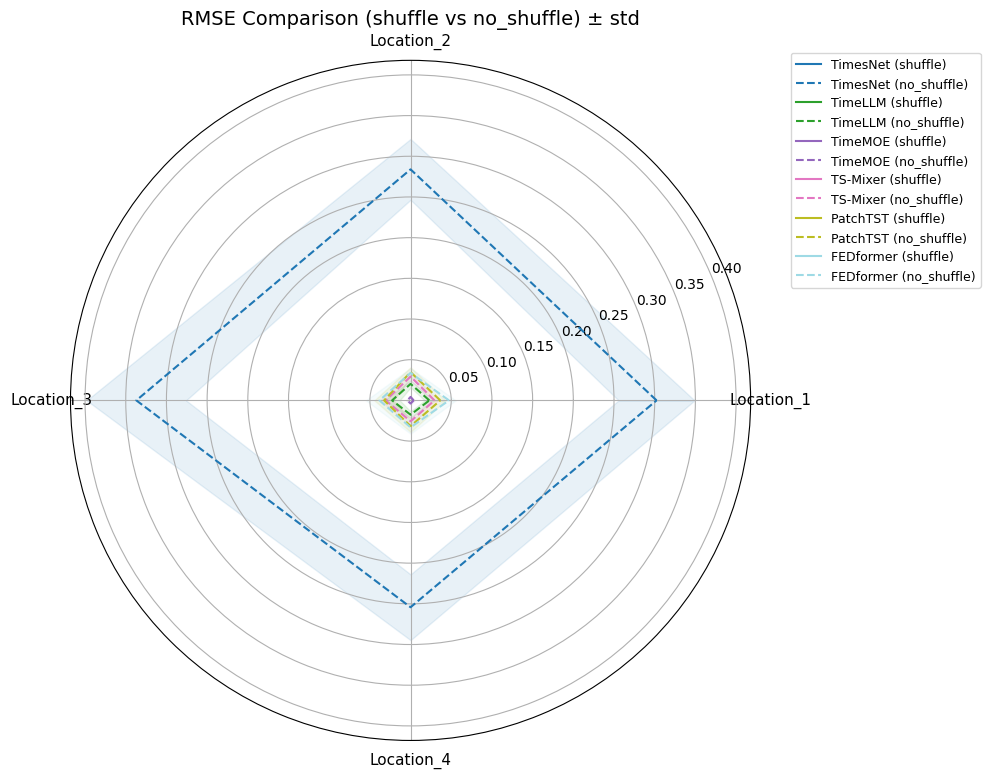

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_11805/3346605288.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(df_metric))


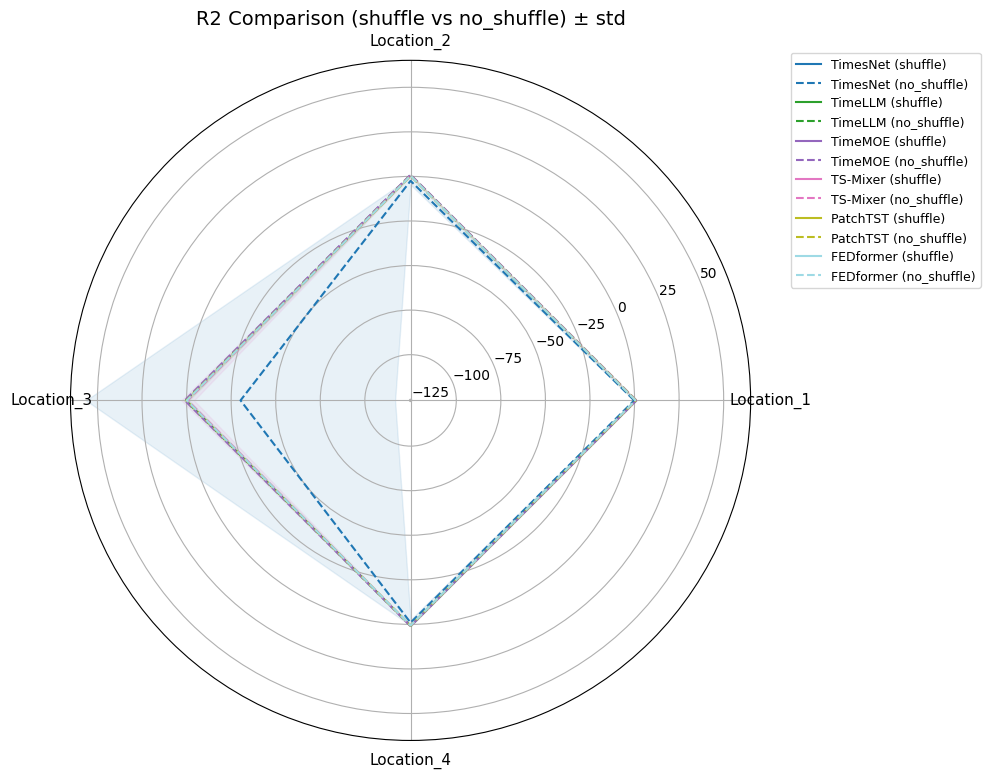

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_11805/3346605288.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(df_metric))


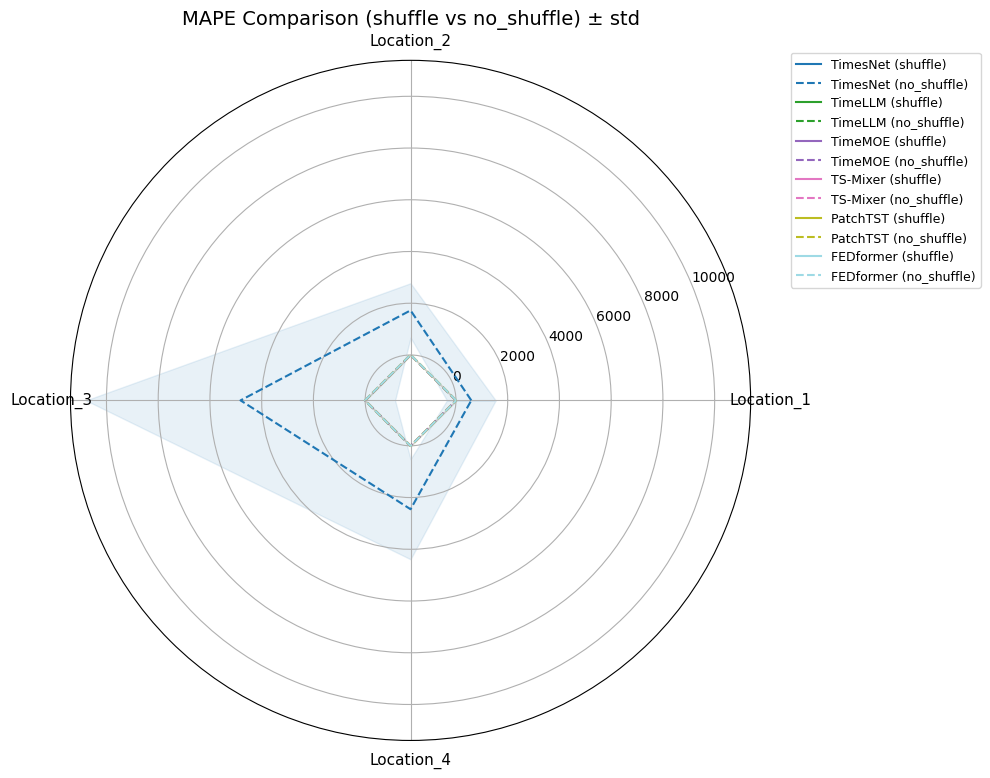

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_11805/3346605288.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(df_metric))


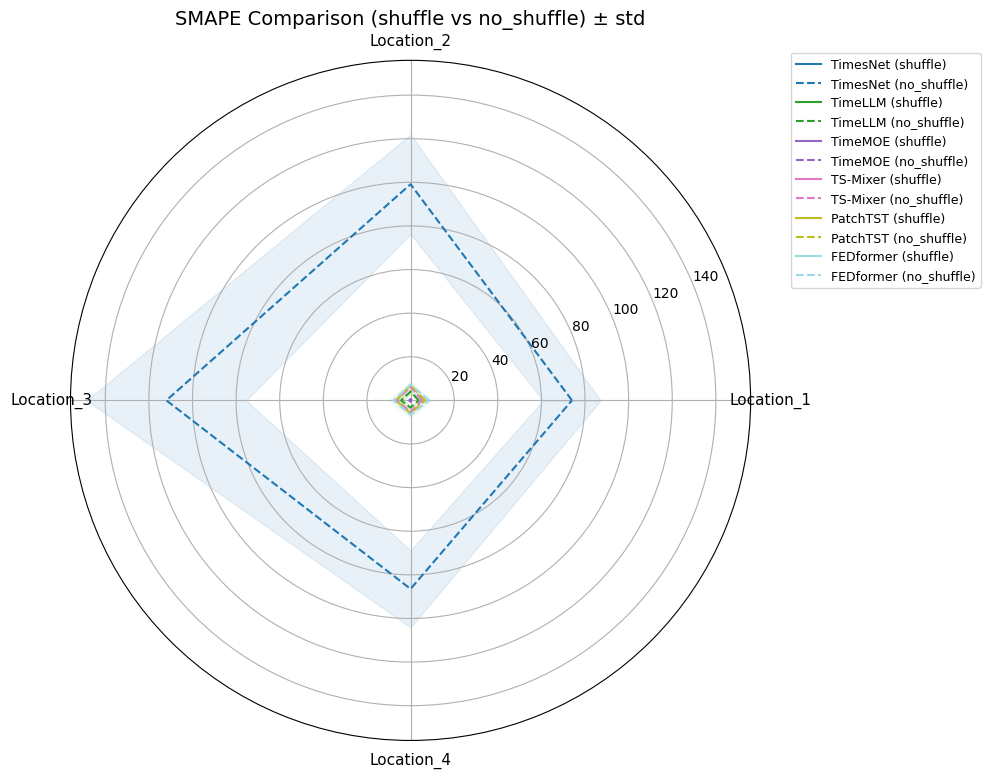

In [105]:
plot_spider_all_models_with_std(structured_results_df_cleaned, metric='MAE')
plot_spider_all_models_with_std(structured_results_df_cleaned, metric='RMSE')
plot_spider_all_models_with_std(structured_results_df_cleaned, metric='R2')
plot_spider_all_models_with_std(structured_results_df_cleaned, metric='MAPE')
plot_spider_all_models_with_std(structured_results_df_cleaned, metric='SMAPE')


In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_model_metric_heatmap(df, metrics=['MAE', 'RMSE', 'R2'], cmap='coolwarm'):
    heatmap_data = []

    for metric in metrics:
        df_metric = df[df['Metric'] == metric]

        for _, row in df_metric.iterrows():
            model = row['Model']
            for col in df.columns:
                if col.endswith(' (shuffle)') or col.endswith(' (no_shuffle)'):
                    variant = 'shuffle' if col.endswith(' (shuffle)') else 'no_shuffle'
                    location = col.replace(' (shuffle)', '').replace(' (no_shuffle)', '')
                    value = row[col]

                    if isinstance(value, list) and value:
                        heatmap_data.append({
                            'Model': model,
                            'Metric': metric,
                            'Variant': variant,
                            'Value': value[0]
                        })

    df_heatmap = pd.DataFrame(heatmap_data)

    # Pivot to have each column as "Metric (Variant)", values as mean
    heatmap_pivot = (
        df_heatmap.groupby(['Model', 'Metric', 'Variant'])['Value']
        .mean()
        .reset_index()
        .assign(MetricVariant=lambda x: x['Metric'] + ' (' + x['Variant'] + ')')
        .pivot(index='Model', columns='MetricVariant', values='Value')
    )

    # Optional: sort rows by average MAE Original
    if 'MAE (Original)' in heatmap_pivot.columns:
        heatmap_pivot = heatmap_pivot.sort_values(by='MAE (Original)', ascending=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        heatmap_pivot,
        annot=True,
        fmt=".2f",
        cmap=cmap,
        linewidths=0.5,
        cbar_kws={"label": "Metric Value"}
    )

    plt.title("Model Performance Heatmap (shuffle vs no_shuffle)", fontsize=14)
    plt.xlabel("Metric (Variant)")
    plt.ylabel("Model")
    plt.tight_layout()
    plt.show()

    return heatmap_pivot


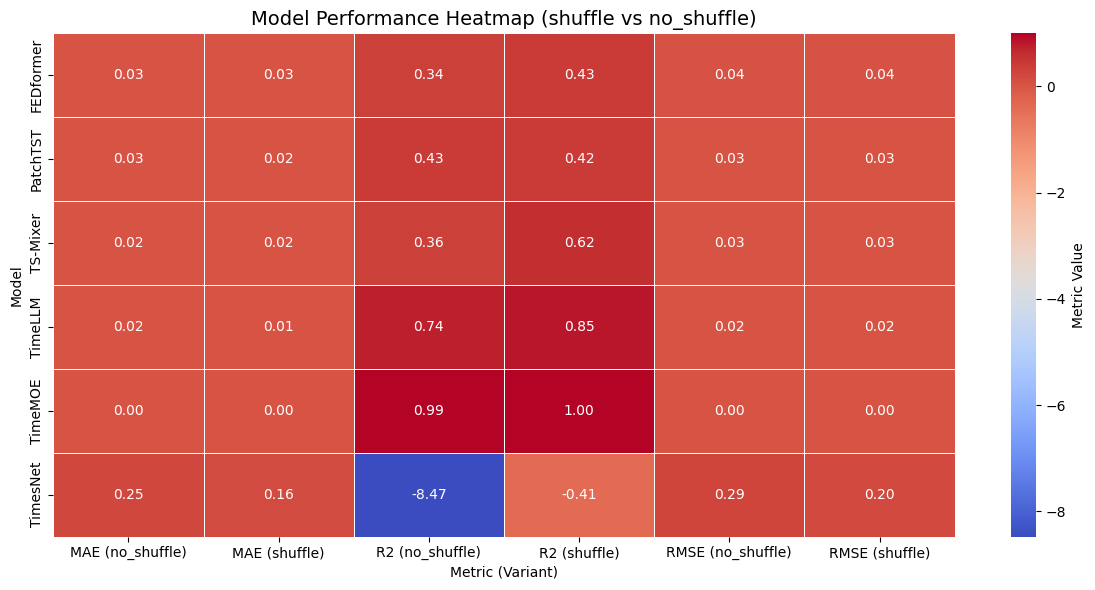

In [107]:
heatmap_df = plot_model_metric_heatmap(structured_results_df_cleaned)

In [108]:
structured_results_df_cleaned.head()

Model Metric Location_1 (shuffle) Location_1 (no_shuffle)  \
0  TimesNet    MAE      [0.196, 0.0461]        [0.2449, 0.0374]   
1  TimesNet   RMSE     [0.2478, 0.0549]        [0.3023, 0.0467]   
2  TimesNet     R2     [0.2145, 0.1859]        [-0.1838, 0.229]   
3  TimesNet   MAPE   [450.547, 705.237]    [592.2208, 942.2189]   
4  TimesNet  SMAPE   [62.3579, 10.1005]       [74.015, 13.1789]   

   Location_2 (shuffle) Location_2 (no_shuffle)    Location_3 (shuffle)  \
0      [0.1335, 0.0242]        [0.2419, 0.0385]        [0.1699, 0.0833]   
1      [0.1733, 0.0325]        [0.2839, 0.0374]         [0.211, 0.0987]   
2     [-0.1244, 0.3565]       [-2.4845, 2.1318]       [-1.9255, 5.0397]   
3  [481.1634, 263.5291]  [1723.7925, 1049.8876]  [1686.3388, 2589.5881]   
4    [95.2583, 20.3425]      [99.1196, 22.7894]     [105.1097, 32.1865]   

  Location_3 (no_shuffle)  Location_4 (shuffle) Location_4 (no_shuffle)  \
0        [0.2944, 0.0612]      [0.1374, 0.0382]          [0.2172, 0.04]   
1         [0.337, 0.0611]      [0.1807, 0.0446]        [0.2542, 0.0404]   
2      [-30.264, 86.7148]      [0.2107, 0.2139]         [-0.96, 1.6352]   
3  [4817.3536, 5975.4219]  [940.1727, 854.0343]  [2451.8568, 1934.1686]   
4     [111.9888, 36.5493]    [76.8961, 12.0913]      [86.4519, 17.6359]   

  All Location Combined (shuffle) All Location Combined (no_shuffle)  
0                [0.1592, 0.0571]                   [0.2496, 0.0522]  
1                [0.2032, 0.0677]                   [0.2943, 0.0549]  
2               [-0.4062, 2.6073]                 [-8.4731, 43.8625]  
3           [889.5555, 1458.5543]             [2396.3059, 3484.5023]  
4              [84.9055, 25.9841]                 [92.8938, 27.4267]

<Figure size 1200x600 with 0 Axes>

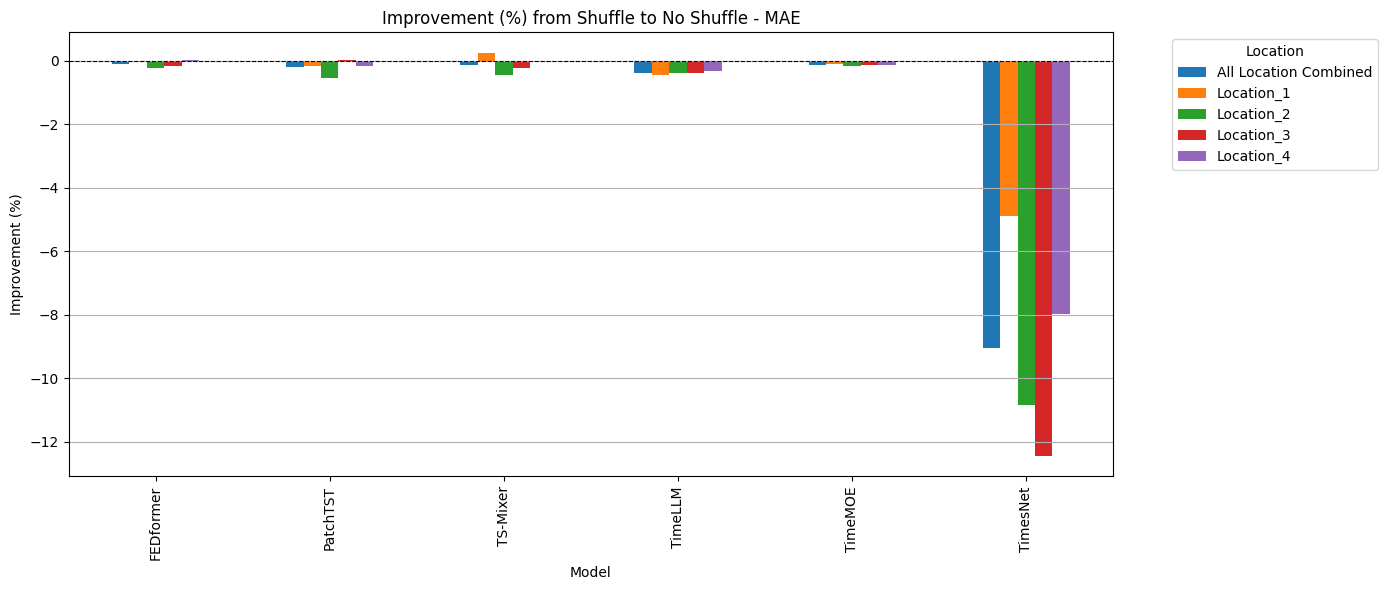

<Figure size 1200x600 with 0 Axes>

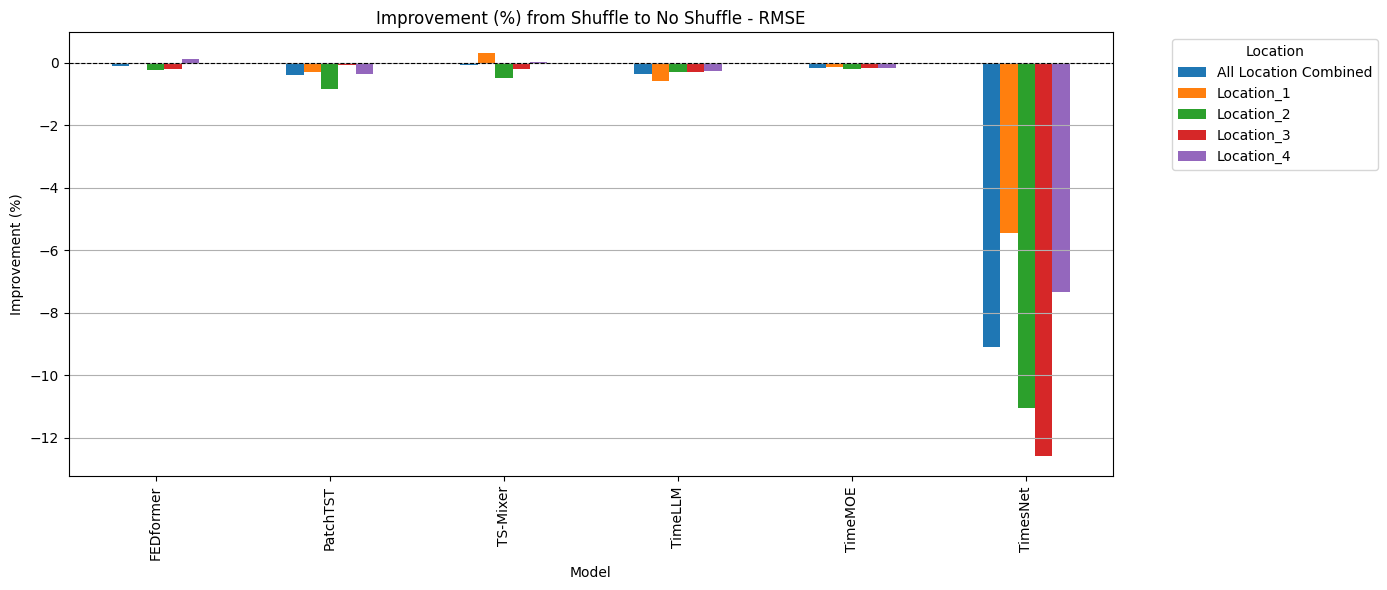

<Figure size 1200x600 with 0 Axes>

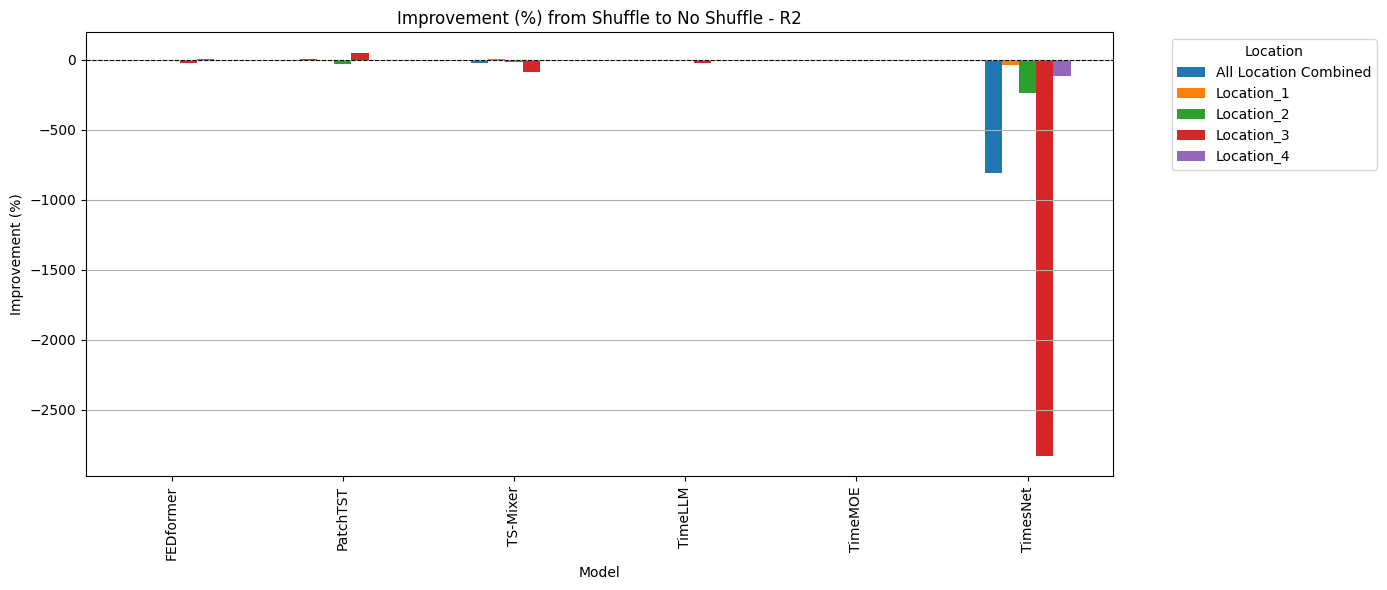

<Figure size 1200x600 with 0 Axes>

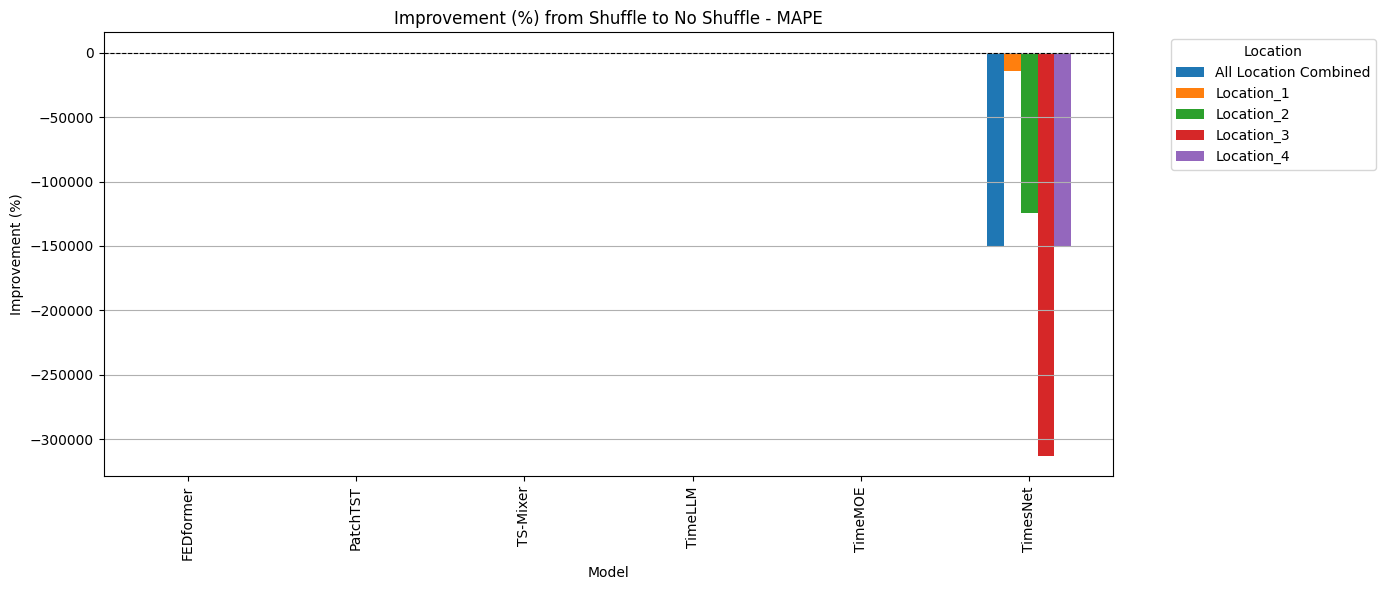

<Figure size 1200x600 with 0 Axes>

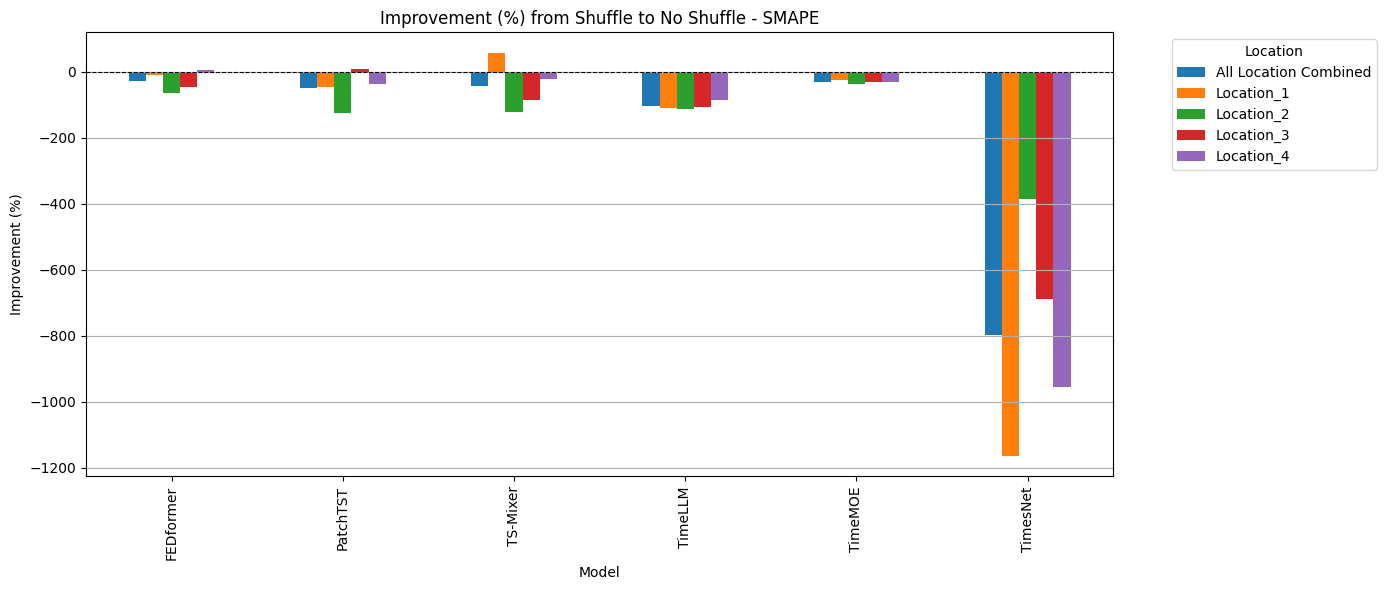

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is already loaded into: df
# Format: columns include 'Model', 'Metric', 'Location_X (Org)', 'Location_X (Aug)', etc.

def compute_improvement_df(df):
    improvement_rows = []
    
    # Loop through each row (Model-Metric)
    for _, row in df.iterrows():
        model = row['Model']
        metric = row['Metric']
        
        for col in df.columns:
            if '(shuffle)' in col:
                loc = col.replace(' (shuffle)', '')
                org_mean, org_std = row[col]
                aug_mean, aug_std = row[f"{loc} (no_shuffle)"]

                if metric == 'R2':  # Higher is better
                    improvement = (aug_mean - org_mean) * 100
                else:  # Lower is better
                    improvement = (org_mean - aug_mean) * 100

                improvement_rows.append({
                    'Model': model,
                    'Metric': metric,
                    'Location': loc,
                    'Improvement (%)': improvement,
                    'Org STD': org_std,
                    'Aug STD': aug_std
                })
    return pd.DataFrame(improvement_rows)

# --- Plotting ---
def plot_improvement_barplot(improvement_df, metric):
    plt.figure(figsize=(12, 6))
    
    # Filter for this metric
    df_metric = improvement_df[improvement_df['Metric'] == metric]
    
    # Pivot: Model x Location → Improvement
    pivot = df_metric.pivot(index='Model', columns='Location', values='Improvement (%)')
    pivot = pivot.sort_index()
    
    pivot.plot(kind='bar', figsize=(14, 6))
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title(f'Improvement (%) from Shuffle to No Shuffle - {metric}')
    plt.ylabel('Improvement (%)')
    plt.xlabel('Model')
    plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True, axis='y')
    plt.show()

# --- Usage ---
improvement_df = compute_improvement_df(structured_results_df_cleaned)
plot_improvement_barplot(improvement_df, metric='MAE')
plot_improvement_barplot(improvement_df, metric='RMSE')
plot_improvement_barplot(improvement_df, metric='R2')
plot_improvement_barplot(improvement_df, metric='MAPE')
plot_improvement_barplot(improvement_df, metric='SMAPE')



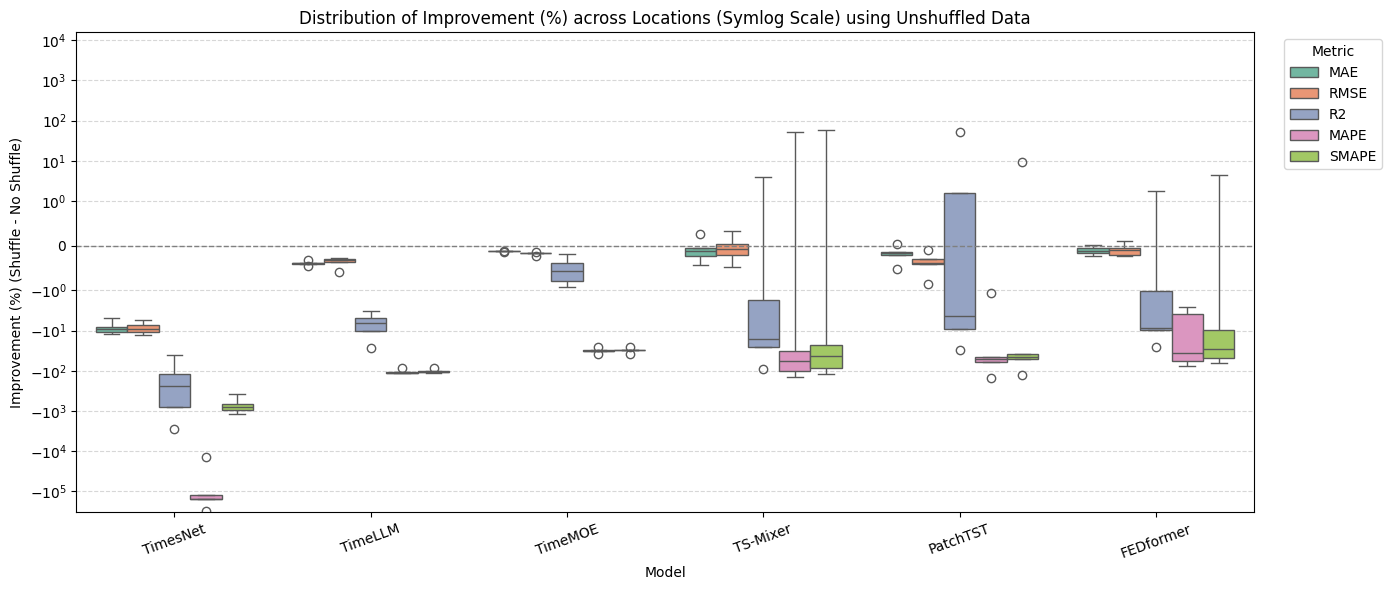

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplot_improvements_symlog(improvement_df):
    plt.figure(figsize=(14, 6))
    sns.boxplot(
        data=improvement_df,
        x='Model',
        y='Improvement (%)',
        hue='Metric',
        palette='Set2',
        showfliers=True
    )
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.yscale('symlog', linthresh=1)  # Set threshold for linear region near zero
    plt.title("Distribution of Improvement (%) across Locations (Symlog Scale) using Unshuffled Data")
    plt.ylabel("Improvement (%) (Shuffle - No Shuffle)")
    plt.xticks(rotation=20)
    plt.legend(title="Metric", bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.show()

# Call the function
plot_boxplot_improvements_symlog(improvement_df)


In [111]:
monthly_summary_dict = {}
folder_path = 'Evaluation_shuffle_vs_no_shuffle/Results'
for model in os.listdir(folder_path):
    path  =  os.path.join(folder_path,model,'monthly_summary.csv')
    monthly_summary_dict[model]  = pd.read_csv(path)


In [112]:
monthly_df =  pd.DataFrame(columns=monthly_summary_dict[next(iter(monthly_summary_dict.keys()))].columns)
for model in monthly_summary_dict.keys():
    df = monthly_summary_dict[model]
    df['Model'] = model
    monthly_df = pd.concat([monthly_df,df],ignore_index=True)

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_11805/1871565408.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  monthly_df = pd.concat([monthly_df,df],ignore_index=True)


In [113]:
monthly_df.head()

month  mae_shuffle_mean  mae_shuffle_std  rmse_shuffle_mean  \
0  2021-01          0.168159         0.045827           0.210074   
1  2021-02          0.166135         0.066519           0.213274   
2  2021-03          0.186113         0.071890           0.231792   
3  2021-04          0.153913         0.029808           0.201116   
4  2021-05          0.124554         0.017171           0.168596   

   rmse_shuffle_std  mape_shuffle_mean  mape_shuffle_std  smape_shuffle_mean  \
0          0.055083        1293.895933       1075.714552           96.488957   
1          0.083363        1386.988993       1710.439562           87.279425   
2          0.088419        2551.546984       4365.100374           89.856276   
3          0.038517         407.773910        349.837689           82.182110   
4          0.027893         908.816665       1024.902325           83.782602   

   smape_shuffle_std  r2_shuffle_mean  ...  mae_no_shuffle_std  \
0          20.610727        -0.136147  ...            0.030523   
1          27.062470        -0.113595  ...            0.044704   
2          34.512353        -0.068969  ...            0.021480   
3          27.041909        -0.001770  ...            0.036188   
4          28.758218        -0.031445  ...            0.033496   

   rmse_no_shuffle_mean  rmse_no_shuffle_std  mape_no_shuffle_mean  \
0              0.285462             0.033715           4560.379459   
1              0.281383             0.056224           2645.071235   
2              0.330600             0.027181           6913.432031   
3              0.262890             0.052357           1093.567486   
4              0.285119             0.025677           3039.965471   

   mape_no_shuffle_std  smape_no_shuffle_mean  smape_no_shuffle_std  \
0          4009.011221              97.954251             25.101681   
1          3045.048466              92.215884             29.634734   
2          9376.272965              97.929517             30.185918   
3          1106.140594              79.491427             15.810758   
4          3370.918765              96.004653             26.255566   

   r2_no_shuffle_mean  r2_no_shuffle_std     Model  
0           -1.863271           3.017561  TimesNet  
1           -1.760025           2.464538  TimesNet  
2           -1.896912           1.980027  TimesNet  
3           -0.766720           0.699808  TimesNet  
4           -3.042526           4.576595  TimesNet  

[5 rows x 22 columns]

In [66]:
import matplotlib.pyplot as plt
import numpy as np

def plot_radar_for_model(monthly_df, model_name):
    df = monthly_df[monthly_df['Model'] == model_name]

    # Calculate average of each metric across months
    metrics = ['mae', 'rmse', 'mape', 'smape', 'r2']
    original = []
    augmented = []
    
    for m in metrics:
        org_mean = df[f"{m}_shuffle_mean"].mean()
        aug_mean = df[f"{m}_no_shuffle_mean"].mean()
        
        # Invert R² to make lower = better
        if m == 'r2':
            org_mean = 1 - org_mean
            aug_mean = 1 - aug_mean
        
        original.append(org_mean)
        augmented.append(aug_mean)

    # Normalize data (min-max) for fair comparison
    all_vals = np.array(original + augmented)
    min_val, max_val = all_vals.min(), all_vals.max()
    original = [(v - min_val) / (max_val - min_val) for v in original]
    augmented = [(v - min_val) / (max_val - min_val) for v in augmented]

    # Radar plot setup
    categories = [m.upper() for m in metrics]
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    original += original[:1]
    augmented += augmented[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, original, label='Shuffle', linewidth=2)
    ax.fill(angles, original, alpha=0.25)

    ax.plot(angles, augmented, label='No Shuffle', linewidth=2)
    ax.fill(angles, augmented, alpha=0.25)

    ax.set_title(f'Radar Plot for {model_name}', size=14)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    ax.grid(True)
    plt.tight_layout()
    plt.show()


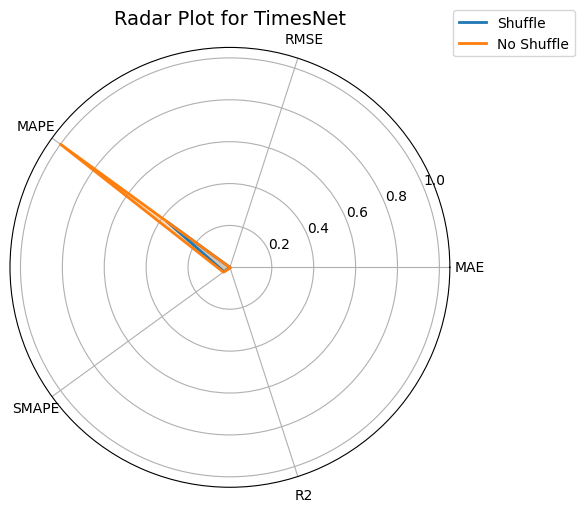

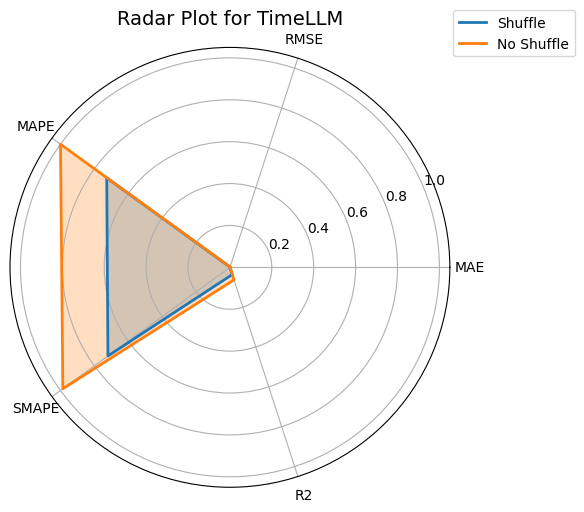

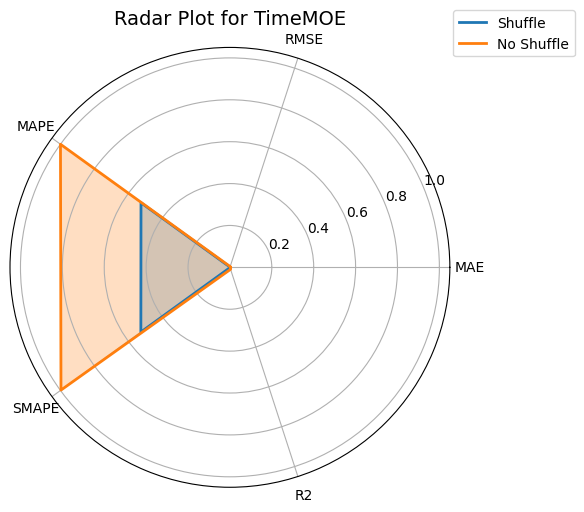

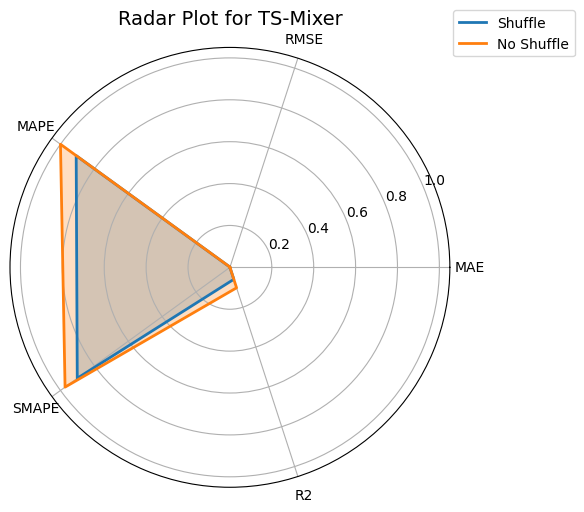

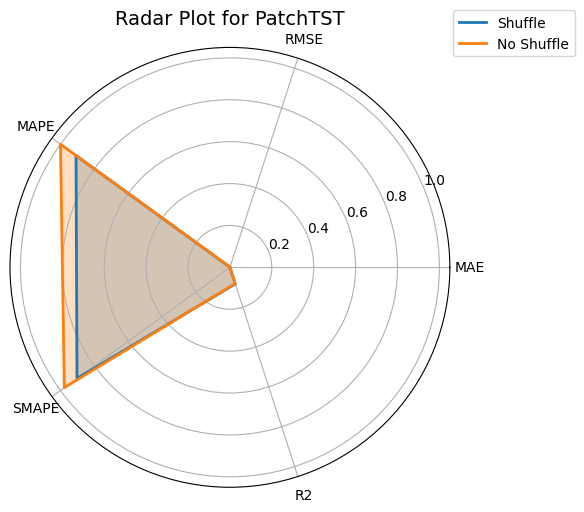

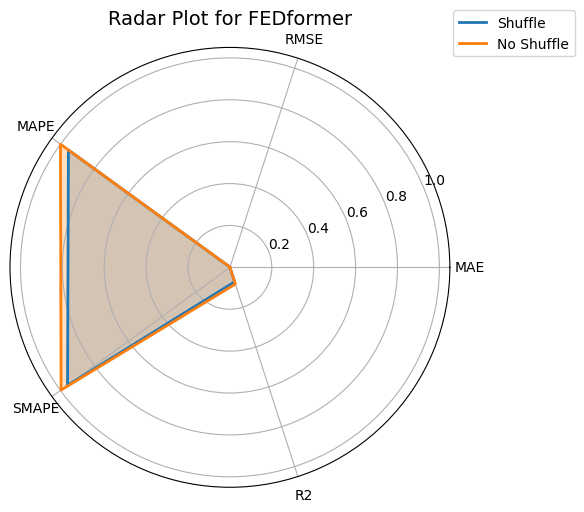

In [67]:
for model in monthly_df['Model'].unique():
    plot_radar_for_model(monthly_df, model)


In [68]:
def plot_boxplot_monthly(metric, monthly_df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    df = monthly_df.copy()
    
    data = pd.DataFrame({
        'Month': pd.to_datetime(df['month']),
        'Shuffle': df[f'{metric}_shuffle_mean'],
        'No Shuffle': df[f'{metric}_no_shuffle_mean'],
        'Model': df['Model']
    })

    melted = data.melt(id_vars=["Month", "Model"], value_vars=["Shuffle", "No Shuffle"], 
                       var_name="Variant", value_name=metric.upper())

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=melted, x="Model", y=metric.upper(), hue="Variant")
    plt.title(f"{metric.upper()} Distribution by Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


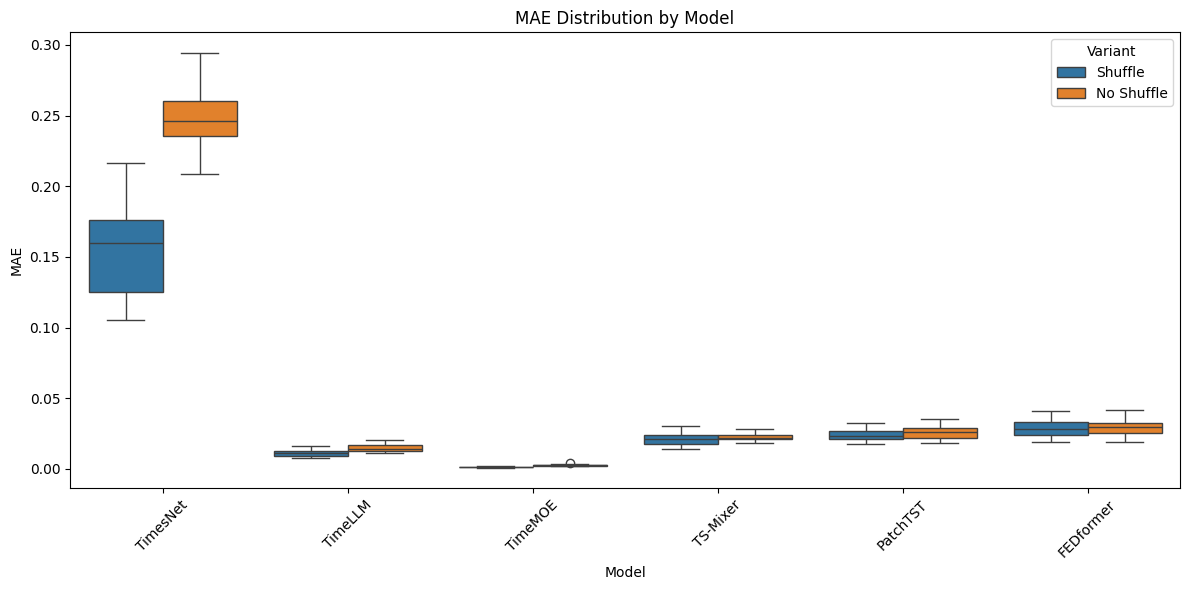

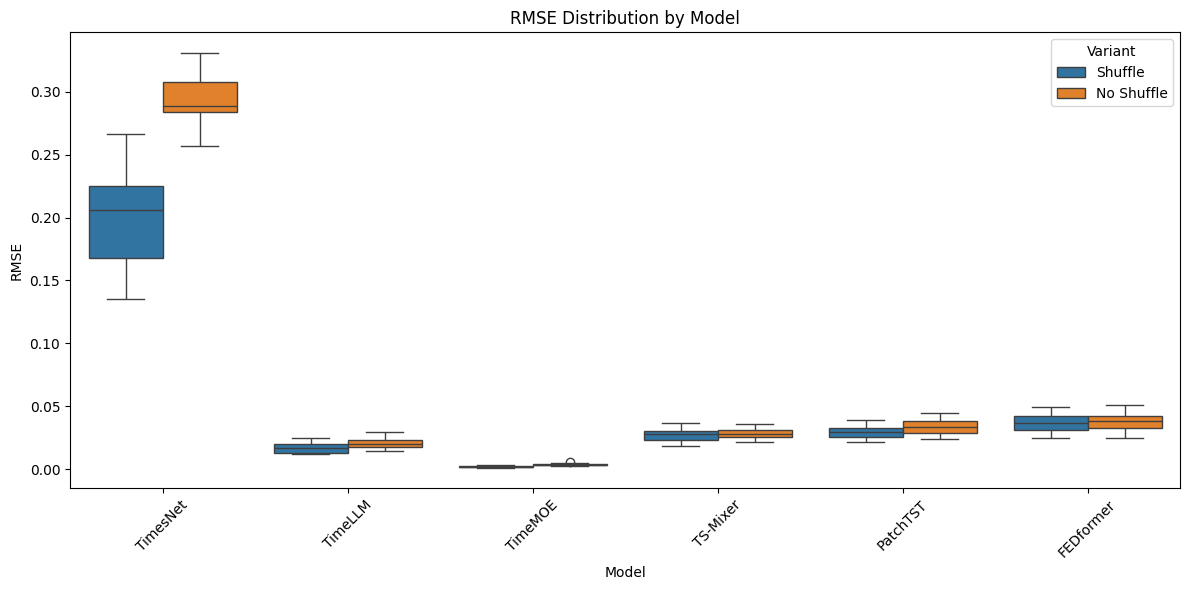

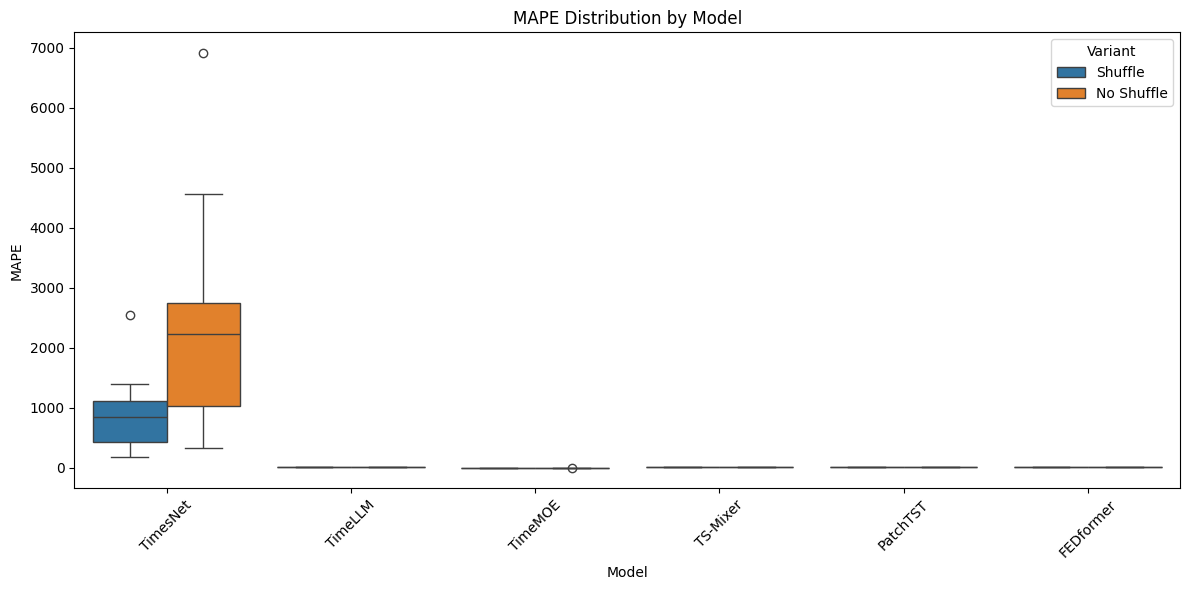

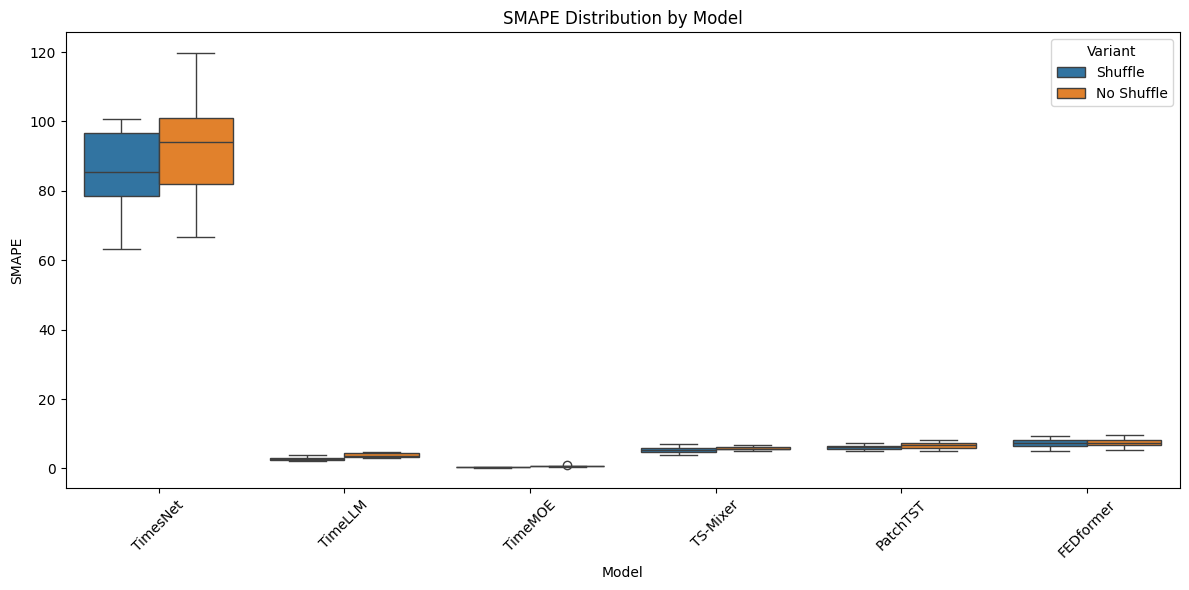

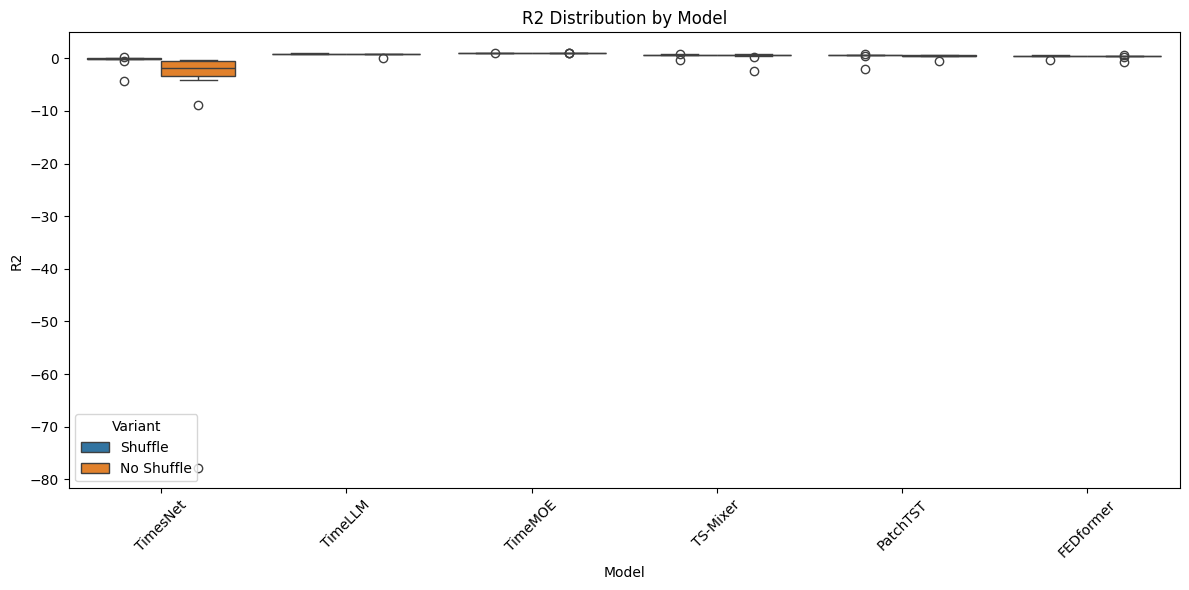

In [69]:
for metric in ['mae', 'rmse', 'mape', 'smape', 'r2']:
    plot_boxplot_monthly(metric, monthly_df)


In [70]:
import matplotlib.pyplot as plt
import numpy as np

def radar_plot_all_models(monthly_df):
    metrics = ['mae', 'rmse', 'mape', 'smape', 'r2']
    categories = [m.upper() if m != 'r2' else '1-R2' for m in metrics]
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    colors = plt.cm.tab10.colors
    model_names = monthly_df['Model'].unique()
    
    for idx, model in enumerate(model_names):
        df = monthly_df[monthly_df['Model'] == model]

        original = []
        augmented = []

        for m in metrics:
            org = df[f"{m}_shuffle_mean"].mean()
            aug = df[f"{m}_no_shuffle_mean"].mean()
            if m == 'r2':
                org = 1 - org
                aug = 1 - aug
            original.append(org)
            augmented.append(aug)

        # Normalize across all collected values for fairness
        all_vals = np.array(original + augmented)
        min_val, max_val = all_vals.min(), all_vals.max()
        original = [(v - min_val) / (max_val - min_val) for v in original]
        augmented = [(v - min_val) / (max_val - min_val) for v in augmented]

        # Close the radar loop
        original += original[:1]
        augmented += augmented[:1]

        ax.plot(angles, original, label=f'{model} - Shuffle', linestyle='-', color=colors[idx % len(colors)])
        ax.fill(angles, original, alpha=0.1, color=colors[idx % len(colors)])

        ax.plot(angles, augmented, label=f'{model} - No Shuffle', linestyle='--', color=colors[idx % len(colors)])
        ax.fill(angles, augmented, alpha=0.1, color=colors[idx % len(colors)])

    # Formatting
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title('Radar Plot: Shuffle vs No Shuffle (All Models)', size=16, pad=20)
    ax.grid(True)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    plt.tight_layout()
    plt.show()


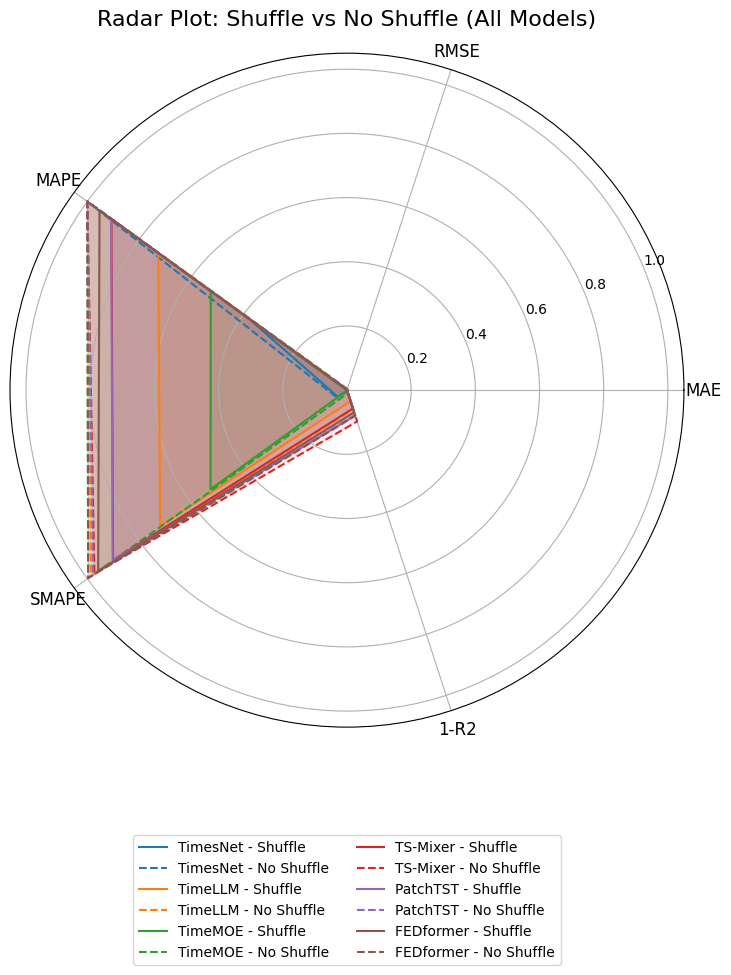

In [71]:
radar_plot_all_models(monthly_df) 

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def lineplot_monthly_metric(monthly_df, metric="mae"):
    models = monthly_df['Model'].unique()
    months = sorted(monthly_df['month'].unique())

    plt.figure(figsize=(14, 7))

    for model in models:
        model_df = monthly_df[monthly_df['Model'] == model].sort_values('month')

        # Plot Original with error bars
        plt.errorbar(
            model_df['month'],
            model_df[f"{metric}_shuffle_mean"],
            yerr=model_df[f"{metric}_shuffle_std"],
            label=f'{model} - Shuffle',
            linestyle='-',
            marker='o',
            capsize=3
        )

        # Plot Augmented with error bars
        plt.errorbar(
            model_df['month'],
            model_df[f"{metric}_no_shuffle_mean"],
            yerr=model_df[f"{metric}_no_shuffle_std"],
            label=f'{model} - No Shuffle',
            linestyle='--',
            marker='x',
            capsize=3
        )

    # Optional: Set y-ticks manually depending on metric
    y_min, y_max = plt.ylim()
    if metric in ["mae", "rmse", "mape", "smape"]:
        step = np.round((y_max - y_min) / 8, 2)
        yticks = np.arange(0, y_max + step, step)
        plt.yticks(yticks)
    elif metric == "r2":
        plt.yticks(np.linspace(-1, 1, 11))  # for R² metric which can be negative

    plt.title(f"Monthly {metric.upper()} Comparison: Shuffle vs No Shuffle", fontsize=16)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel(metric.upper(), fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(ncol=2, fontsize=10)
    plt.tight_layout()
    plt.show()


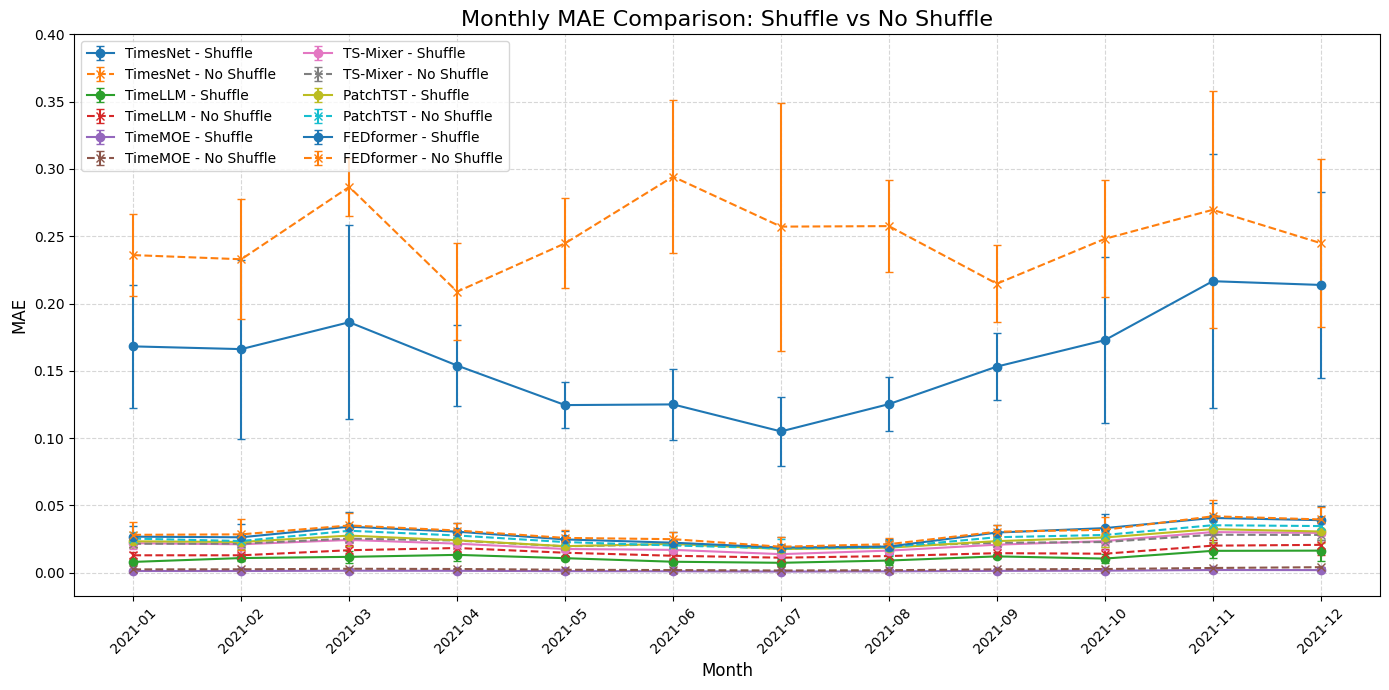

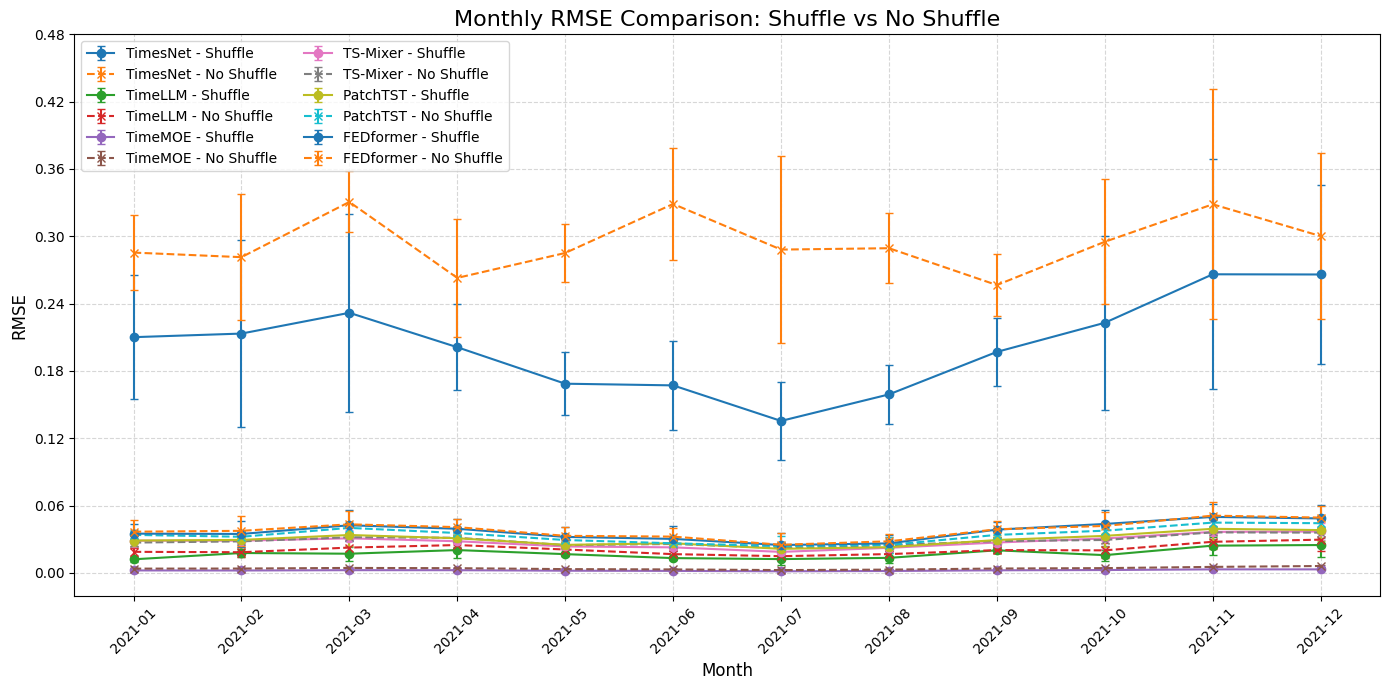

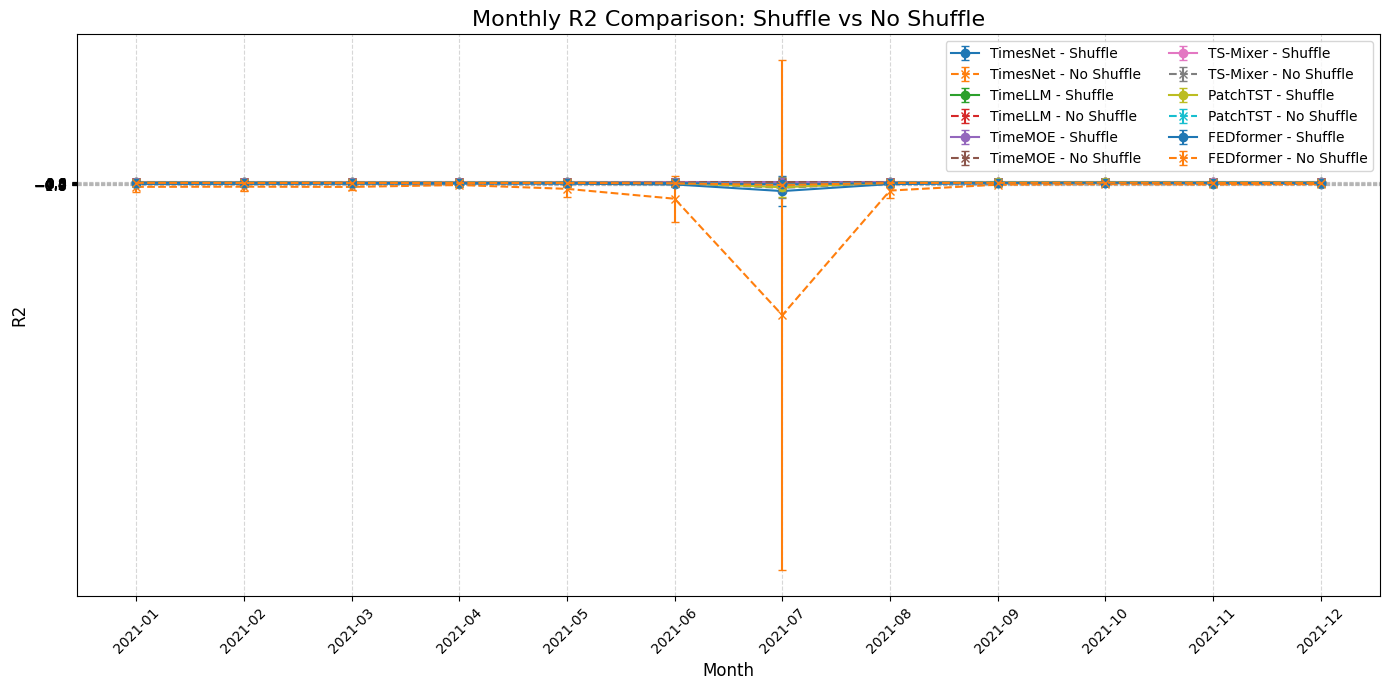

In [73]:
lineplot_monthly_metric(monthly_df, metric="mae")
lineplot_monthly_metric(monthly_df, metric="rmse")
lineplot_monthly_metric(monthly_df, metric="r2")

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def lineplot_monthly_metric_with_std(monthly_df, metric="mae", variant="shuffle", log_base=10):
    """
    Plot monthly metric with std error bars and log scale.
    """
    metric_mean_col = f"{metric.lower()}_{variant}_mean"
    metric_std_col = f"{metric.lower()}_{variant}_std"

    if metric_mean_col not in monthly_df.columns:
        raise ValueError(f"Column '{metric_mean_col}' not found in dataframe.")

    # Ensure 'month' is treated as ordered categorical
    monthly_df['month'] = pd.Categorical(monthly_df['month'], categories=sorted(monthly_df['month'].unique()), ordered=True)

    plt.figure(figsize=(14, 7))

    for model in monthly_df['Model'].unique():
        model_data = monthly_df[monthly_df['Model'] == model]
        x = model_data['month']
        y = model_data[metric_mean_col]
        yerr = model_data[metric_std_col]

        plt.errorbar(x, y, yerr=yerr, label=model, marker='o', capsize=3)

    plt.yscale('log', base=log_base)
    plt.title(f'Monthly {metric.upper()} with Std (log scale) - {variant.upper()}')
    plt.xlabel("Month")
    plt.ylabel(metric.upper())
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


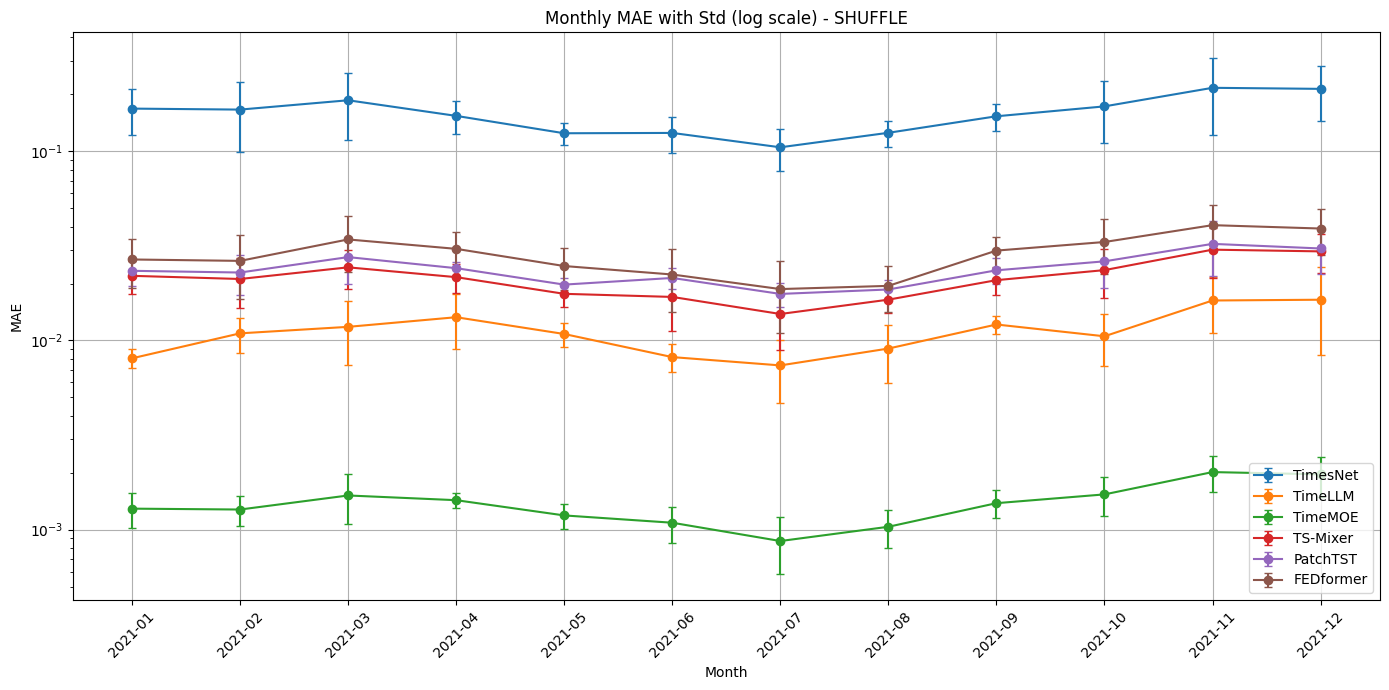

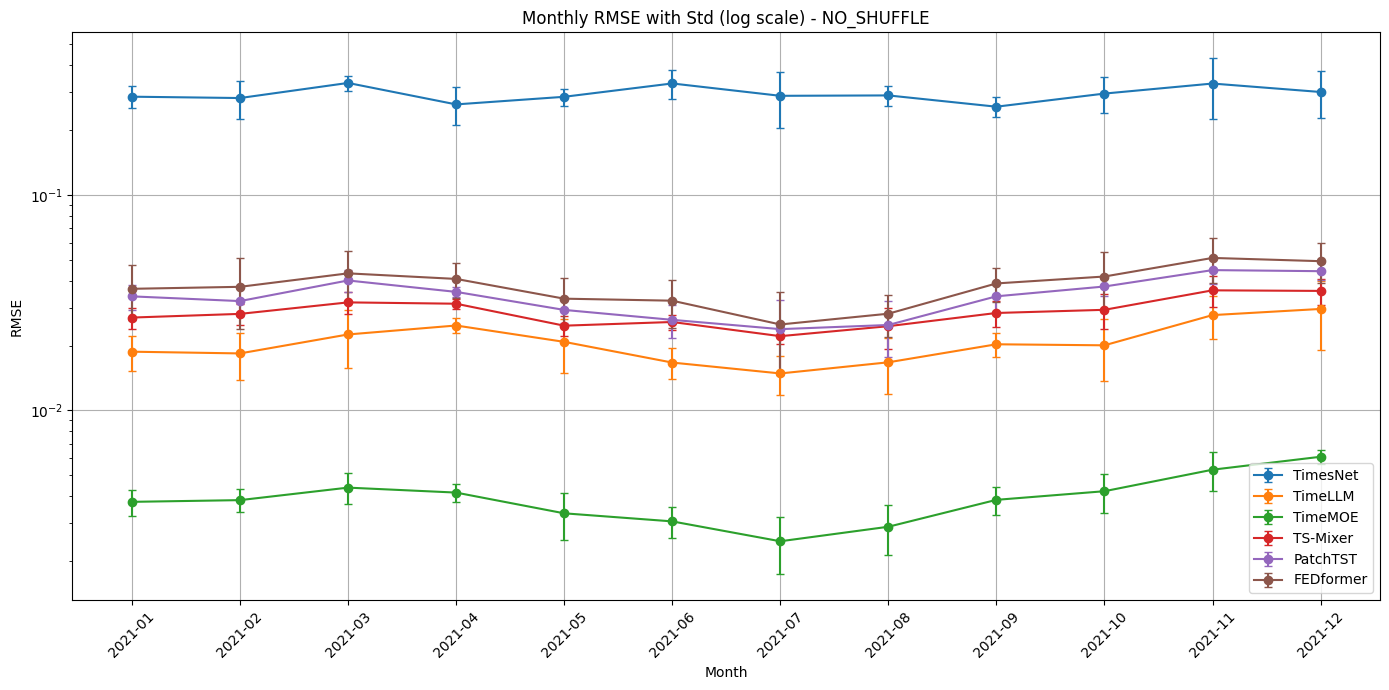

In [75]:
lineplot_monthly_metric_with_std(monthly_df, metric="mae", variant="shuffle", log_base=10)
lineplot_monthly_metric_with_std(monthly_df, metric="rmse", variant="no_shuffle", log_base=10)
